# **Objective**
* The ultimate goal of this project is to develop an application that the Automotive Industry could use to harness data to make informed decisions.
* It helps to find out which is the most popular car on the basis of its engine type, fuel type, mileage, model, etc.
* It will help them to figure out the trending designs of cars and can use those reports to accordingly manipulate the design of the cars,by making them more optimized, customer-centric, and innovative.
* It also allows them to find out the relation between different parameters like how exactly the prices vary with the independent variables. With the help of customer segmentation, they can find which group of people prefers which features.

**This dataset contains the number of specifications in a new car:**

1. Height-weight-length
2. Suspension
3. Body
4. Fuel type
5. Mileage
6. Audio system

**Everything above available in a brand new car and then based on all those features it's ex-showroom price is given**

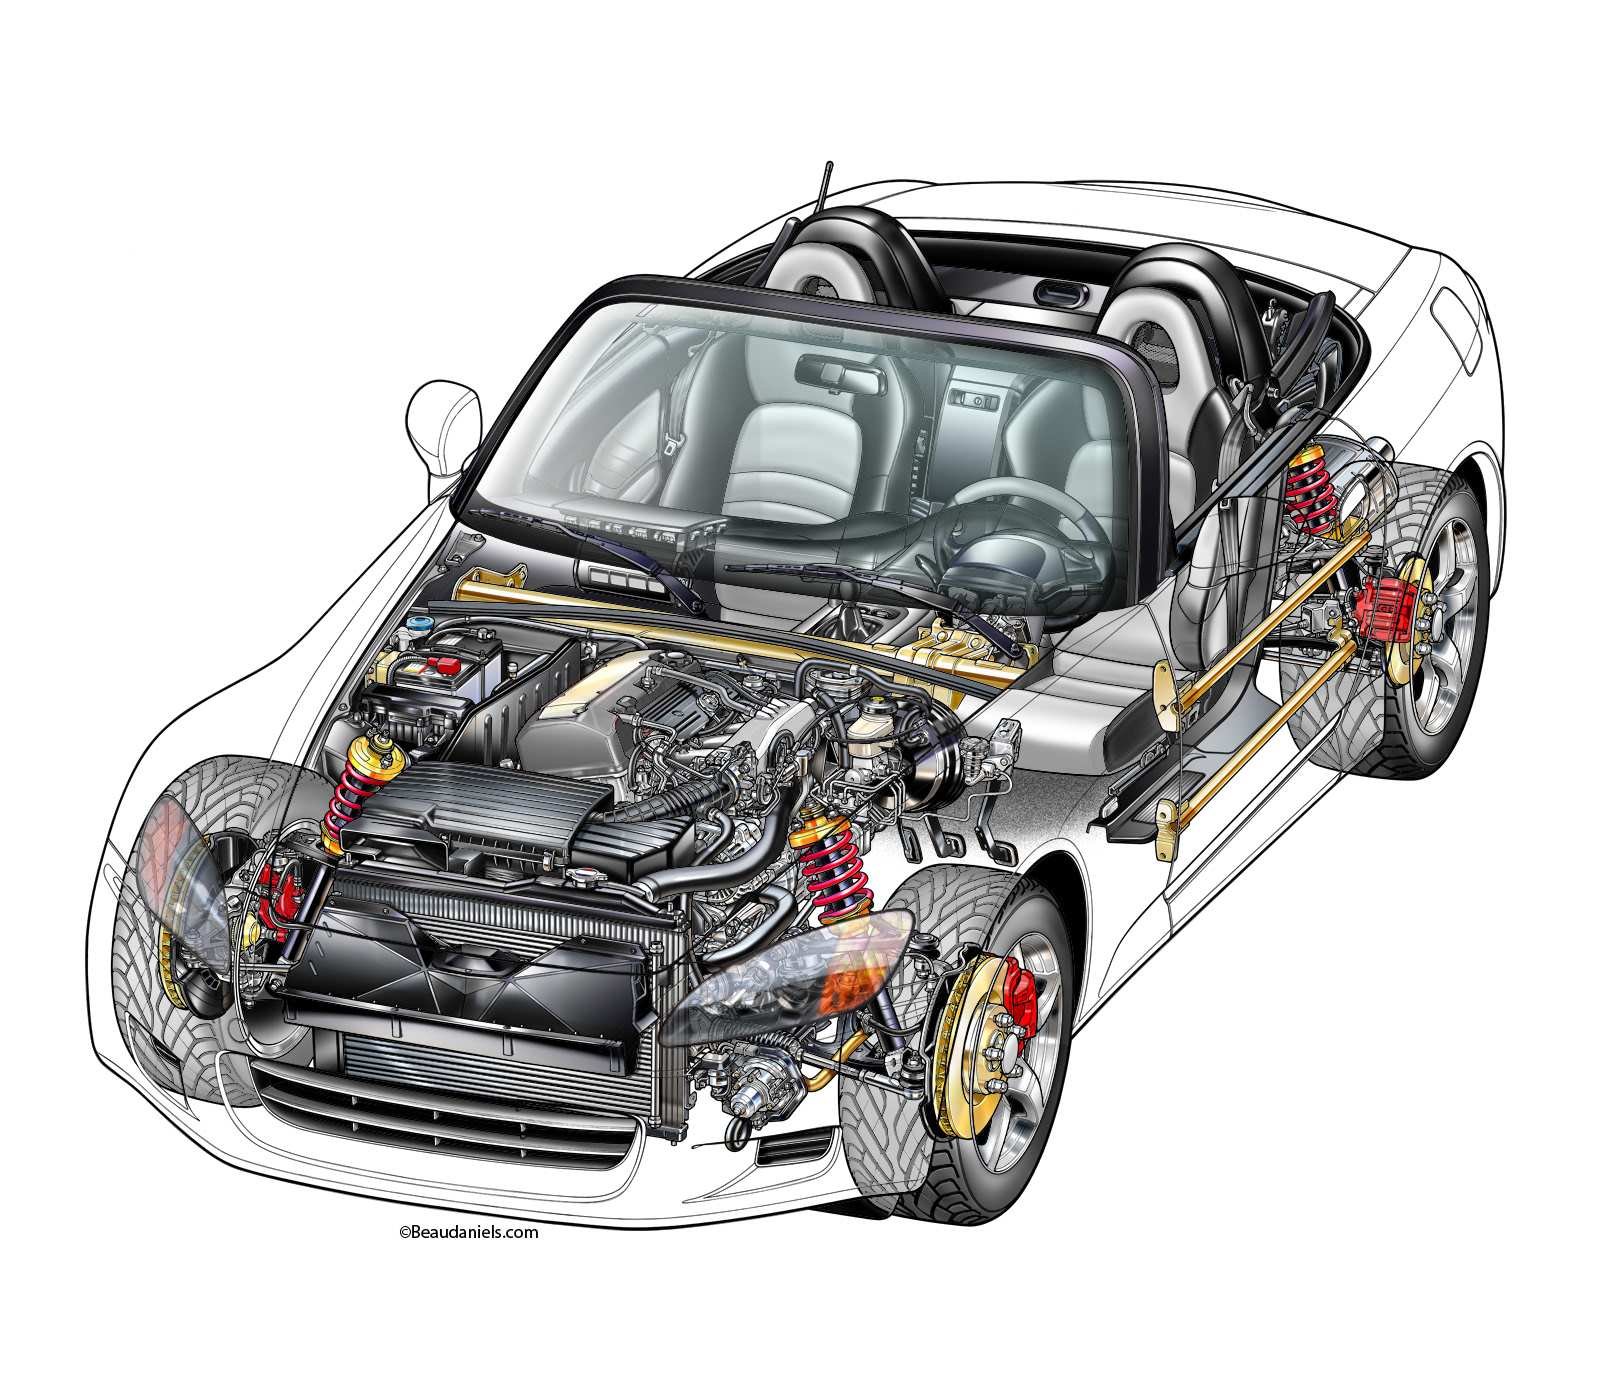

#### DataSource: https://www.kaggle.com/datasets/harmeetsingh07/exshowroom-pric


**This Dataset contains Columns: 141 entries dtypes:**
* Float64(6)
* Int64(1)
* Object(134)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Work process**
*  Step 1: Basic Data understanding
* Step 2: Data cleaning and Data Feature Engineering
* Step 3: Data Insights
* Step 4: Data preparation
* Step 5: Model building and evaluation
* Step 6 : Conclusion

# ***Step 1: Basic Data understanding***

*1.1 Importing required Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",500)

*1.2 Loading the Data Set*

In [3]:
df=pd.read_csv("/kaggle/input/exshowroom-price/cars_engage_2022 (1).csv")
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

*1.3 Checking shape*

In [4]:
df.shape


(1276, 141)

**Row and Columns**
* Rows : 1276
* Columns : 141

*1.4 Preview of Data*

In [ ]:
df.head()

*1.5 Drop irrelevant columns*

In [5]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
df.shape

(1276, 140)

*1.6 Basic understanding of Data*

In [ ]:
df.info() 

*1.7 Fetching column names*

In [ ]:
df.columns

# **Step 2 : Data Cleaning and Feature Engineering**

*2.1 Checking missing values*

In [7]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

*2.2 Checking missing %*

In [8]:
name= df.isnull().sum().rename('num_of_missing').reset_index()
name.columns = ['feature', 'num_of_missing']
name['percentage_of_missings'] = name['num_of_missing'].apply(lambda x:x/len(df))
name.sort_values(by='percentage_of_missings',ascending=False)
name.style.background_gradient(cmap='Oranges')

,feature,num_of_missing,percentage_of_missings
0,Make,75,0.058777
1,Model,0,0.000000
2,Variant,0,0.000000
3,Ex-Showroom_Price,0,0.000000
4,Displacement,12,0.009404
5,Cylinders,66,0.051724
6,Valves_Per_Cylinder,102,0.079937
7,Drivetrain,7,0.005486
8,Cylinder_Configuration,13,0.010188
9,Emission_Norm,11,0.008621


<AxesSubplot:xlabel='feature', ylabel='percentage_of_missings'>

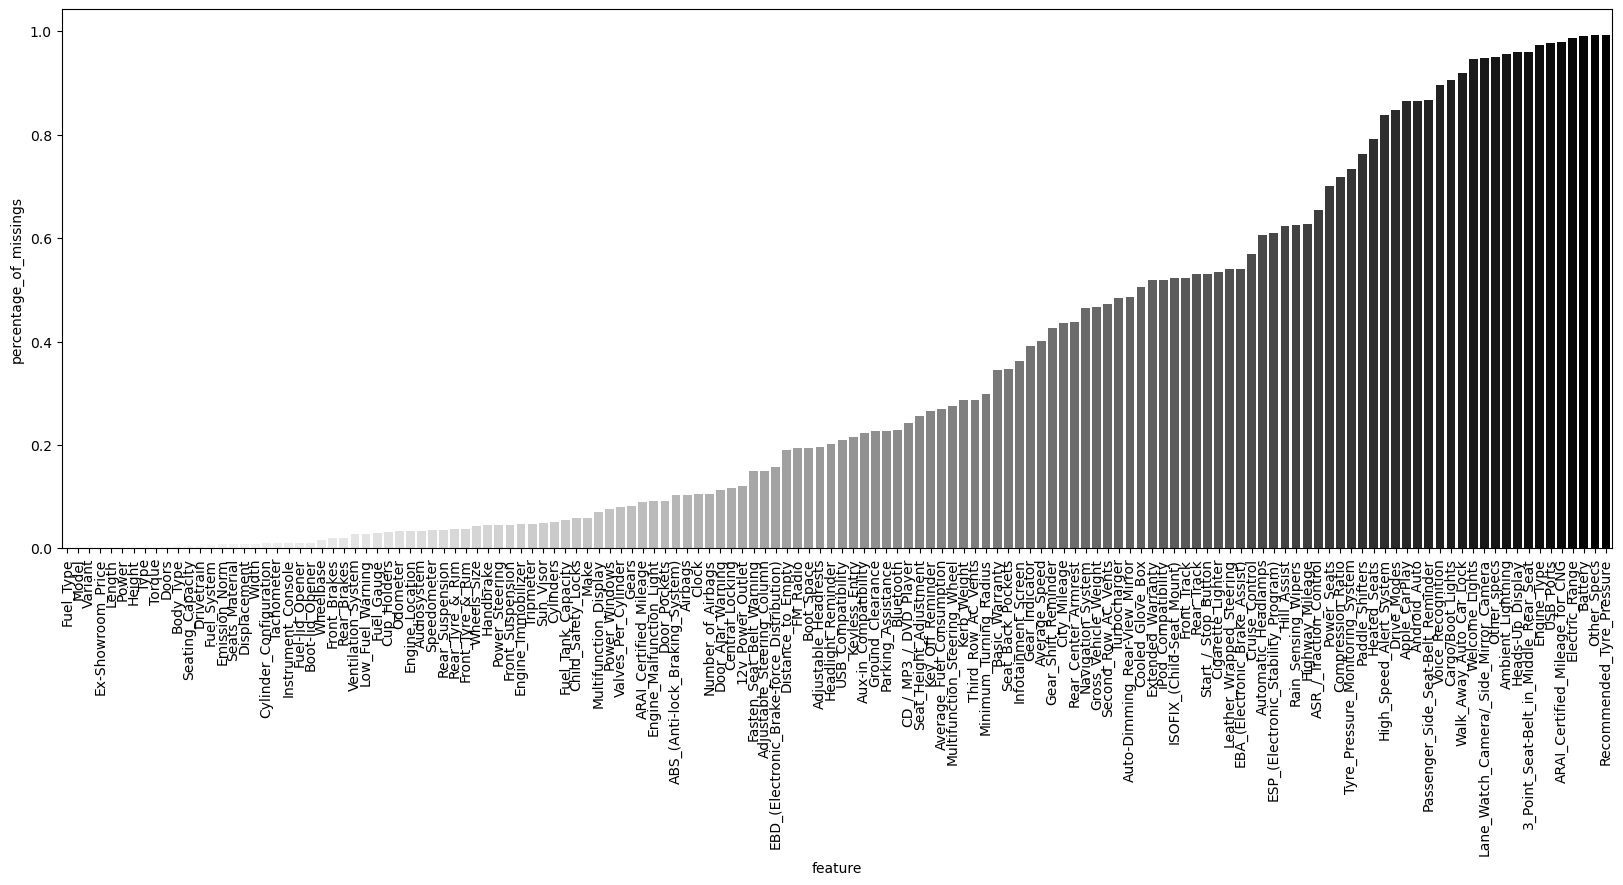

In [9]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.barplot(x='feature',y='percentage_of_missings',palette=("Greys"),data=name.sort_values(by='percentage_of_missings'))

*2.3 Deleting the columns having more than 70% of missing value*

In [10]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

In [11]:
df.shape

(1276, 115)

**Total Rows left : 115**



*2.4 Checking column types in order to handle the missing values*

In [ ]:
df.dtypes

*Seggregating the numeric and object data*

*2.5 Numeric Data*

In [12]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)

In [13]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


*2.5.1 Filling the missing values of numeric data*

In [14]:
df_numeric.isnull().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

*2.5.2 Filling missing values of df_numeric with median since median is robust to outliers.*

In [15]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

In [16]:
df_numeric.isnull().sum().sum()

0

* *Missing values have been filled in the numeric columns.*

*2.6 Categorical data*

**df_obj is dataframe having columns values of object type only.**

In [17]:
df_obj=df.select_dtypes(include="object")
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c...,NaN,Internal,110 litres,NaN,NaN,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,NaN,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,NaN,NaN,NaN,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin

*2.6.1 Extracting important categorical features with respect to price in df_obj_list*

* *Since column count of object data type is 110 (large) so we will fetch those columns which are important with respect to car price which we found through domain knowledge.*

In [18]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)

45

* Column count is 45 

*2.6.2 Since we consider above columns and fetch the data corresponds to them and save it to df_obj*

In [19]:
df_obj=df_obj.loc[:,df_obj_list]

In [21]:
len(df_obj.columns)

45

In [22]:
df_obj.head()


,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,NaN,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*2.6.3 Checking the missing values % in df_obj which is having 45 columns*

In [ ]:
for i in df_obj.columns:
    print(i,"---------",(df_obj[i].isnull().sum()/df_obj.shape[0]))

In [23]:
name1= df_obj.isnull().sum().rename('num_of_missing').reset_index()
name1.columns = ['feature', 'num_of_missing']
name1['percentage_of_missings'] = name1['num_of_missing'].apply(lambda x:x/len(df))
name1.sort_values(by='percentage_of_missings',ascending=False)
name1.style.background_gradient(cmap='Oranges')

,feature,num_of_missing,percentage_of_missings
0,Make,75,0.058777
1,Model,0,0.000000
2,Variant,0,0.000000
3,Ex-Showroom_Price,0,0.000000
4,Displacement,12,0.009404
5,Drivetrain,7,0.005486
6,Emission_Norm,11,0.008621
7,Keyless_Entry,274,0.214734
8,Power,0,0.000000
9,Torque,2,0.001567


<AxesSubplot:xlabel='feature', ylabel='percentage_of_missings'>

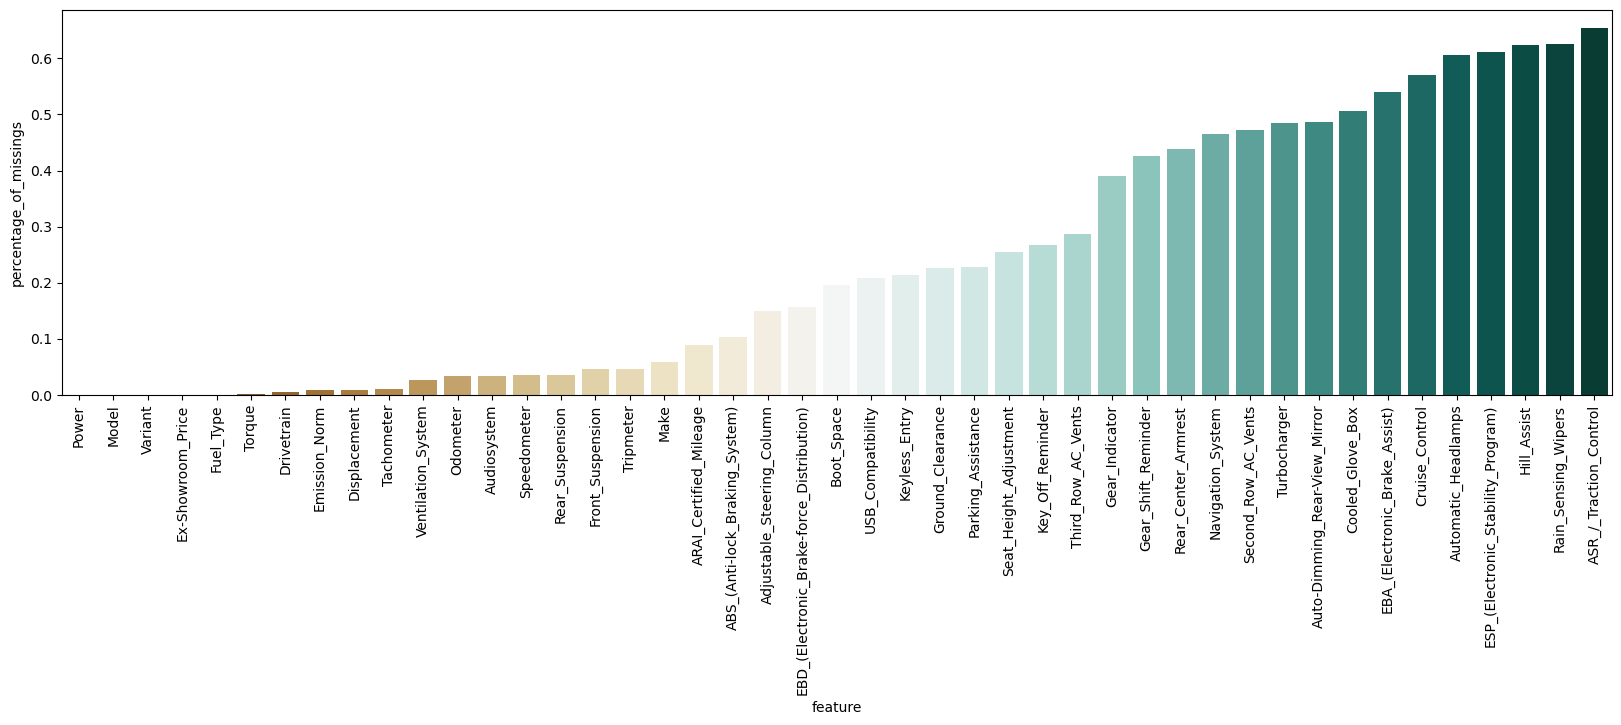

In [24]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='feature',y='percentage_of_missings',palette=("BrBG"),data=name1.sort_values(by='percentage_of_missings'))

*2.6.4 Ambiguity in Model column(Wagon)*

In [25]:
df_obj[df_obj["Model"]=="Wagon"].head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1173,Maruti Suzuki R,Wagon,Vxi,"Rs. 4,79,000",998 cc,FWD (Front Wheel Drive),BS 6,Remote,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Analog,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,Maruti Suzuki R,Wagon,Vxi Ags,"Rs. 5,26,000",998 cc,FWD (Front Wheel Drive),BS 6,Remote,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Analog,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1175,Maruti Suzuki R,Wagon,1.2L Zxi,"Rs. 5,48,000",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,1130Nm@4200rpm,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,Maruti Suzuki R,Wagon,Lxi,"Rs. 4,34,000",998 cc,FWD (Front Wheel Drive),BS 6,NaN,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Not on offer,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,Not on offer,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,NaN,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,Maruti Suzuki R,Wagon,1.2L Vxi,"Rs. 5,13,501",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,113Nm@4200RPM,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Torsion beam with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Based on the ambiguity observed in the "make" and "model" columns, we can perform the following replacements:**

* Replace "Land Rover Rover" with "Land Rover" in the "make" column.
* Replace "Maruti Suzuki R" with "Maruti Suzuki" in the "make" column.
* Replace "Range" with "Range Rover" in the "model" column.
* Replace "Wagon" with "Wagon R" in the "model" column.

**After performing these replacements, the updated "make" and "model" columns would be:**

**Make Column:**

* "Land Rover Rover" would be updated to "Land Rover"
* "Maruti Suzuki R" would be updated to "Maruti Suzuki"

****Model Column:****

* "Range" would be updated to "Range Rover"
* "Wagon" would be updated to "Wagon R"

In [26]:
df_obj["Make"]=df_obj["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj["Make"]=df_obj["Make"].replace("Land Rover Rover","Land Rover")

In [27]:
df_obj["Model"]=df_obj["Model"].replace("Range","Range Rover")
df_obj["Model"]=df_obj["Model"].replace("Wagon","Wagon R")

*2.6.5 Handling the columns of object data type one by one*

* Filling the missing values in make column

In [28]:
df_obj[df_obj["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
...,...,...
1151,NaN,Mercedes-Benz Gla-Class
1219,NaN,Rolls-Royce Phantom
1220,NaN,Rolls-Royce Phantom
1251,NaN,Mercedes-Benz Glc


**So mercedes,rolls royce and go+ cars which has corresponding company name is not available so we fill the company name of mercedes,rolls royce and go+ cars(models) corresponding to null place in Make column**

**We use combine_first method to fill null values of Make with the corresponding entry of model then we replace mercedes , rolls-royce , go+ cars with their company name Mercedes, Rolls-Royce and Datsun respectively**

* Note : combine_first() method is used to combine two series into one. The result is union of the two series that is in case of Null value in caller series, the value from passed series is taken. In case of both null values at the same index, null is returned at that index.

In [29]:
df_obj["Make"]=df_obj["Make"].combine_first(df_obj["Model"])
df_obj["Make"]

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

*Check missing values again*

In [30]:
df_obj["Make"].isnull().sum()

0

* NaN values have been filled with their corresponding model's name

*Replacing mercedes , rolls-royce , go+ cars with their company name Mercedes, Rolls-Royce and Datsun respectively.*

In [31]:
for i in df_obj["Make"]:
    if "Mercedes" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")

In [32]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

* Model does not have missing values
* Variant doesn't have missng values
* Ex-Showroom_Price ---- doesn't have missing values

In [33]:
df["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

* Removing "Rs. " , "," in Ex-Showroom_price 

In [34]:
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

In [35]:
df_obj["Ex-Showroom_Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

*Renaming Ex-Showroom_Price column name to Price*

In [36]:
df_obj.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

* Displacement


*Checking missing values in Displacement*

In [37]:
df_obj["Displacement"].isnull().sum()

12

*Removing " cc" from displacement values :*

In [38]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace(" cc","")

In [39]:
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', '72',
       '2393', '2694', '2755', '1799', '2199', '3198', '2198', '2400',
       '1950', '2967', '4999', '4367', '3993', '3902', '3900', '6262',
       '6498', '6598', '1172', '2489', '1353', '1500', '1596', '2487',
 

*Checking mode values of all columns of df_obj dataframe*

In [40]:
df_obj["Displacement"].mode()[0]

'1197'

In [41]:
for i in df_obj.columns:
    print(i,"<---->",df_obj[i].mode()[0])

Make <----> Maruti Suzuki
Model <----> Nexon
Variant <----> Lxi
Price <----> 999900
Displacement <----> 1197
Drivetrain <----> FWD (Front Wheel Drive)
Emission_Norm <----> BS IV
Keyless_Entry <----> Smart Key
Power <----> 83PS@6000rpm
Torque <----> 200Nm@1750rpm
Odometer <----> Digital
Speedometer <----> Analog
Tachometer <----> Analog
Tripmeter <----> Yes
Fuel_Type <----> Petrol
ARAI_Certified_Mileage <----> 23 km/litre
Front_Suspension <----> MacPherson Strut
Rear_Suspension <----> Torsion Beam
Ground_Clearance <----> 165 mm
Boot_Space <----> 350 litres
Audiosystem <----> CD Player with USB & Aux-in
Third_Row_AC_Vents <----> Not Applicable
Ventilation_System <----> Fully automatic climate control
Auto-Dimming_Rear-View_Mirror <----> Yes
Hill_Assist <----> Yes
Gear_Indicator <----> Yes
ABS_(Anti-lock_Braking_System) <----> Yes
EBD_(Electronic_Brake-force_Distribution) <----> Yes
Gear_Shift_Reminder <----> Yes
Adjustable_Steering_Column <----> Rake, Reach
Parking_Assistance <----> Rear

*Replacing those features having yes or no values with its mode value.*

In [42]:
for i in df_obj.columns:
    if df_obj[i].isna().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace = True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)

*Now checking missing values of df_obj again*

In [43]:
c=0
for i in df_obj.columns:
        print(i,"<-------->",(df_obj[i].isnull().sum()/df_obj.shape[0])) ## missing values percentage 
        c=c+1
print(c)

Make <--------> 0.0
Model <--------> 0.0
Variant <--------> 0.0
Price <--------> 0.0
Displacement <--------> 0.0
Drivetrain <--------> 0.0
Emission_Norm <--------> 0.0
Keyless_Entry <--------> 0.0
Power <--------> 0.0
Torque <--------> 0.0
Odometer <--------> 0.0
Speedometer <--------> 0.0
Tachometer <--------> 0.0
Tripmeter <--------> 0.0
Fuel_Type <--------> 0.0
ARAI_Certified_Mileage <--------> 0.0
Front_Suspension <--------> 0.0
Rear_Suspension <--------> 0.0
Ground_Clearance <--------> 0.0
Boot_Space <--------> 0.0
Audiosystem <--------> 0.0
Third_Row_AC_Vents <--------> 0.0
Ventilation_System <--------> 0.0
Auto-Dimming_Rear-View_Mirror <--------> 0.0
Hill_Assist <--------> 0.0
Gear_Indicator <--------> 0.0
ABS_(Anti-lock_Braking_System) <--------> 0.0
EBD_(Electronic_Brake-force_Distribution) <--------> 0.0
Gear_Shift_Reminder <--------> 0.0
Adjustable_Steering_Column <--------> 0.0
Parking_Assistance <--------> 0.0
Key_Off_Reminder <--------> 0.0
USB_Compatibility <--------> 0.

* *Missing values have been filled in df_obj*

**Certainly! Here's a revised version of the steps to clean the "Power", "ARAI_Certified_Mileage", "Ground_Clearance", "Bootspace", and "Torque" columns for better use in modeling:**

* Clean the "Power" column:
Remove any non-numeric characters (such as units, symbols, etc.) from the "Power" column using regular expressions or string manipulation techniques.
Convert the "Power" column to a numeric data type (e.g., float or int) for numerical calculations.
* Clean the "ARAI_Certified_Mileage" column:
Remove any non-numeric characters (such as units, symbols, etc.) from the "ARAI_Certified_Mileage" column using regular expressions or string manipulation techniques.
Convert the "ARAI_Certified_Mileage" column to a numeric data type (e.g., float or int) for numerical calculations.
* Clean the "Ground_Clearance" column:
Remove any non-numeric characters (such as units, symbols, etc.) from the "Ground_Clearance" column using regular expressions or string manipulation techniques.
Convert the "Ground_Clearance" column to a numeric data type (e.g., float or int) for numerical calculations.
* Clean the "Bootspace" column:
Remove any non-numeric characters (such as units, symbols, etc.) from the "Bootspace" column using regular expressions or string manipulation techniques.
Convert the "Bootspace" column to a numeric data type (e.g., float or int) for numerical calculations.
* Clean the "Torque" column:
Remove any non-numeric characters (such as units, symbols, etc.) from the "Torque" column using regular expressions or string manipulation techniques.
Convert the "Torque" column to a numeric data type (e.g., float or int) for numerical calculations.



* Power

*first fetching 4 characters from it then correct it*

In [44]:
df_obj["Power"]=df_obj["Power"].apply(lambda x:x[0:4])

In [45]:
df_obj["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

In [46]:
l1=[]
for i in df_obj["Power"]:
    s1=""
    for j in i:
        if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            #print(j)
            s1="undefined"
        elif j.isdigit() or j==".":
            s1=s1+j
    #print(s)
    l1.append(s1)

In [47]:

df_obj["Power"]=l1

In [48]:
df_obj["Power"].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '76.6', '64', '80', '75', '90', '81.8', '70', '71', '84',
       '100', '76', '105', '110', '84.3', '96', '65', '93', '140', '89',
       '82', '173', '177', '178', '141', '154', '120', '180', '143',
       '150', '122', '136', '183', '148', '250', '116', '192', '190',
       '231', '247', '245', '248', '179', '333', '265', '340', '401',
       '240', '468', '286', '334', '410', '300', '258', '557', '262',
       '450', '609', '275', '350', '430', '585', '289', '460', '299',
       '630', '453', '550', '261', '455', '610', '650', '590', '560',
       '608', '605', '563', '570', '625', '512', '1479', '1600', '13',
       '12', '48', '47', '67', '77', '101.', '117', '118', '114', '63',
       '63.9', '123', '106', '85', '128', '109', '115', '25.8', '41.5',
       '119', '104', '121', '155', '41', '156', '166', '164', '174',
       '162', '163', '88.4', '142.', '200', '160', '187', '372', '181',
       '

* ARAI_Certified_Mileage

*First check the unique values*

In [49]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', '23 km/litre', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23.01 km/litre', '24.04 km/litre', '15 km/litre',
       '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/litre',

*Splitting the column on the basis of " " and then removing "kmpl".*

In [51]:
df_obj["ARAI_Certified_Mileage"]= df_obj["ARAI_Certified_Mileage"].str.split(' ', expand=True)[0]

In [52]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("kmpl","")

*Mileage cannot be in four digit of any car so this is an ambiguity, we will correct 1449 by replacing it with 14.49.*

In [53]:
df[(df["ARAI_Certified_Mileage"]=='1449 km/litre')]


,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,NaN,Mercedes-Benz C-Class,C 43 Amg,"Rs. 75,00,000",3982 cc,8.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,66 litres,Petrol,1426 mm,4756 mm,1839 mm,Coupe,4.0,NaN,NaN,1449 km/litre,1730 kg,7,112 mm,Ventilated Disc,Ventilated Disc,AGILITY CONTROL suspension with selective damp...,AGILITY CONTROL suspension with selective damp...,NaN,NaN,245/35R19,245/35R19,Electric Power,All Windows,Yes,Smart Key,503bhp@5500rpm,700Nm@1750RPM,Digital,Analog,Analog,Yes,5.0,Leather,Automatic,2840 mm,245/35R19,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3 years / Unlimited Kms,Yes,"Internal, With Remote",435 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,4th year /with (absolutely no mileage restrict...,Yes,Internal,Analog,Automatic,Analog + Digital,Yes,5.64 meter,Yes,Driver & Front Passenger,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,NaN,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,Yes,Yes,7.0,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


*The entry is found at index number 1036 so we correct it with 14.49*

In [54]:
df.loc[1036,"ARAI_Certified_Mileage"]

'1449 km/litre'

In [55]:
df.loc[1036,"ARAI_Certified_Mileage"]=14.49

In [56]:
df.loc[1036,"ARAI_Certified_Mileage"]

14.49

*  The entry has been rectified.

In [57]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', '23', '21.9', '25.17', '22.5', '23.01', '24.04', '15',
       '24.07', '20.1', '23.1', '20.3', '24', '20.89', '20.5', '16',
       '23.7', '18.16', '23.59', '18.97', '19.49', '22.95', '17.57',
       '15.7', '20.14', '20', '28.4', '22', '18.6', '22.54', '18.15',
       '25.35', '20.4', '25.4', '18.78', '17.21', '19.91', '24.4', '19',
       '21.66', '21.73', '26.1', '19.4', '16.78', '17.71', '20.08',
       '17.1', '23.87', '21.01', '19.56', '18.2', '27.3', '16.3', '13.8',
       '12.35', '12.05', '17.06', '14.4', '19.5', '18.3', '13.7', '18.19',
       '20.38', '19.2', '14.81', '15.04', '17.9', '10', '15.73', '16.9',
       '21.15', '14.59', '16.47', '11', '13.12', '19.33', '14.11',
       '18.56', '13.57', '13.38', '11.24', '13', '12.8', '8.61',
       '9.8-10.0', '7.4', '11.6', '12', '11.13', '18', '10.8', '17.66',
       '11.86', '7.96', '13.5', '7.8', '14', '7.9', '10.63', '6.71',
       '8.6', '9', '8.77', '17.3', '7.29', '10.2', '9.5', '22.4-21.9',
       '22.8', 

* *Torque*

In [58]:
df_obj["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

* Splitting the column on the basis of "@" and then correcting it.

In [59]:
df_obj["Torque"]=df_obj["Torque"].str.split('@', expand=True)[0]

In [60]:
l2=[]
for i in df_obj["Torque"]:
    s=""
    for j in i:
        #print(j)
        if j=="u" and "n" and "d" and "e" and "f" and "i" and "n" and "e" and "d":
            #print(j)
            s="undefined"
        elif j.isdigit() or j==".":
            s=s+j
    #print(s)
    l2.append(s)
df_obj["Torque"]=l2

In [61]:
df_obj["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '99.04', '10.1',
       '8.3', '114', '113', '96', '103.9', '152', '183', '170', '190',
       '140', '115', '220', '95', '172', '230', '175', '250', '215',
       '120', '132', '160', '209', '210', '110', '200', '350', '380',
       '420', '340', '189', '300', '320', '270', '280', '400', '365',
       '430', '370', '500', '620', '450', '515', '570', '624', '347',
       '480', '550', '619', '760', '410', '335', '600', '850', '900',
       '580', '520', '1000', '700', '770', '650', '560', '720', '755',
       '540', '780', '800', '1020', '1600', '1479', '18.9', '16.1', '69',
       '16.3', '240', '103', '112.7', '1712', '22.4', '260', '207', '195',
       '150', '205', '142', '245', '151', '155', '133', '153', '70',
       '105', '145', '247', '321', '138', '330', '360', '343', '173',
       '174', '353', '440', '470', '385', '640', '625', '740', '689',
       '510', '630', '697', '690', '59', '197', '134', '130', '180',
       '

* *Ground_Clearance*

In [62]:

df_obj["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

 *Removing " mm" from Ground_Clearance column*

In [63]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace(" mm","")

In [64]:
df_obj["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', '170', '182', '200', '154',
       '163', '190', '174', '172', '205', '220', '149', '198', '208',
       '164', '161', '211', '146', '125', '100', '212', '167', '152',
       '137', '206', '210', '307', '140', '109', '241', '215', '110',
       '142', '119', '130', '113', '150', '175', '209', '195', '133',
       '225', '188', '179', '136', '157', '201', '155', '498', '218',
       '238', '295.5', '227', '295', '128', '135', '186', '192', '132',
       '112', '213', '121', '122', '108', '183', '158', '124', '138',
       '235'], dtype=object)

* Boot Space

In [65]:
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', '350 litres', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 l

*Removing " litres" from Boot_Space column.*

In [66]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" litres","")

In [67]:
df_obj["Boot_Space"].replace('209(All3RowsUp).550(3rdRowFolded)&803(2ndRowand3rdRowFolded)','209',inplace=True)

In [68]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235',
       '350', '242', '240', '260', '625', '454', '251', '210', '407',
       '320', '316', '285', '280', '378', '257', '330', '592', '339',
       '354', '438', '615', '522', '150', '425', '488', '470', '460',
       '278', '215', '432', '360', '480', '455', '505', '520', '560',
       '550', '650', '1025', '540', '465', '515', '500', '605', '530',
       '510', '580', '261', '133', '616', '358', '430', '230', '490',
       '443', '395', '20', '256', '243', '268', '345', '419', '390',
       '420', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70', '450', '525', '347', '363', '375', '392', '433',
       '981', '586', '341', '435', '825', '326', '368', '132', '249',
       '421', '610',

*Will change type of all columns together later*

In [69]:
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace=True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
            df_obj[i].fillna("undefined",inplace=True)
        else:
            df_obj[i]=df_obj[i].fillna(df_obj[i].mode()[0])
df_obj.isnull().sum().sum()

0

In [70]:
for i in df_obj.columns:
    print(i,"---------",df_obj[i].unique())

Make --------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model --------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6'

*2.6.6 Correction*

* Bcz of "9.8-10.0", we are not able to convert data type to float, so to resolve this we will take the average of this.

In [71]:
i="9.8-10.0"
l=i.split("-")
l[0]=float(l[0])
l[1]=float(l[1])
a=(l[0]+l[1])/2
print(a)
#df_obj[i]= df_obj[i].str.split("-", expand=True)[0] 
#for i in df_obj["Price"]:
    #for j in i:
        #if "-" in i:

9.9


In [72]:
l=["Torque","ARAI_Certified_Mileage","Ground_Clearance","Boot_Space","Displacement"]
for j in l:
    #print(j)
    for i in df_obj[j]:
        #print(i)
        if "-" in i:
            l1=i.split("-")
            print(l1)
            l1[0]=float(l1[0])
            l1[1]=float(l1[1])
            avg=(l1[0]+l1[1])/2
            print(avg)
            avg=str(avg)
            print(type(avg))
            df_obj[j]=df_obj[j].replace(i,avg)
            print(df_obj[j])

['9.8', '10.0']
9.9
<class 'str'>
0        23.6
1        23.6
2          23
3        21.9
4        23.6
        ...  
1271     25.1
1272     25.1
1273     22.6
1274     17.8
1275    11.56
Name: ARAI_Certified_Mileage, Length: 1276, dtype: object
['22.4', '21.9']
22.15
<class 'str'>
0        23.6
1        23.6
2          23
3        21.9
4        23.6
        ...  
1271     25.1
1272     25.1
1273     22.6
1274     17.8
1275    11.56
Name: ARAI_Certified_Mileage, Length: 1276, dtype: object


* Checking the unique values again for any ambiguity

In [73]:
for i in df_obj.columns:
    print(i,"---------",df_obj[i].unique())

Make --------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model --------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6'

*2.6.7 Making null again and filling*

In [74]:
l=["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]
for i in l:
    df_obj[i]=df_obj[i].replace("undefined",np.nan)

*2.6.8 Converting below mentioned columns of df_obj having numeric columns into float type*

In [75]:
for column in["Torque","Power","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column]=df_obj[column].astype("float64")

*2.6.9 Filling the NaN with mean.*

In [76]:
for column in["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_obj[column] =df_obj[column].fillna(df_obj[column].mean())

In [77]:
df_obj.isnull().sum().sum()

0

*2.6.10 Joining the two dataframes df_numeric and df_obj into df*

In [78]:
df=pd.concat([df_numeric,df_obj],axis=1)
df.shape

(1276, 50)

*Viewing the top 3 rows of df*

In [79]:
df.head(3)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,23.0,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


*Cylinders and Valves_Per_Cylinder are same so dropping one*

In [80]:
df.drop(columns=["Valves_Per_Cylinder"],inplace=True)

In [81]:
df.shape

(1276, 49)

# ***Step 3 : Data Insights***

*  Based on target (Price)

**How many cars of each companies ?**

***Insight:***

* Maruti Suzuki is the most popular Make ,followed by Hyundai ,Mahindra,Tata and so on.
* Hyundai has second number of highest cars
* DC has less number of cars
* Skoda and Ford are having equal count,
* Bmw and Renault are having nearly equal count, 

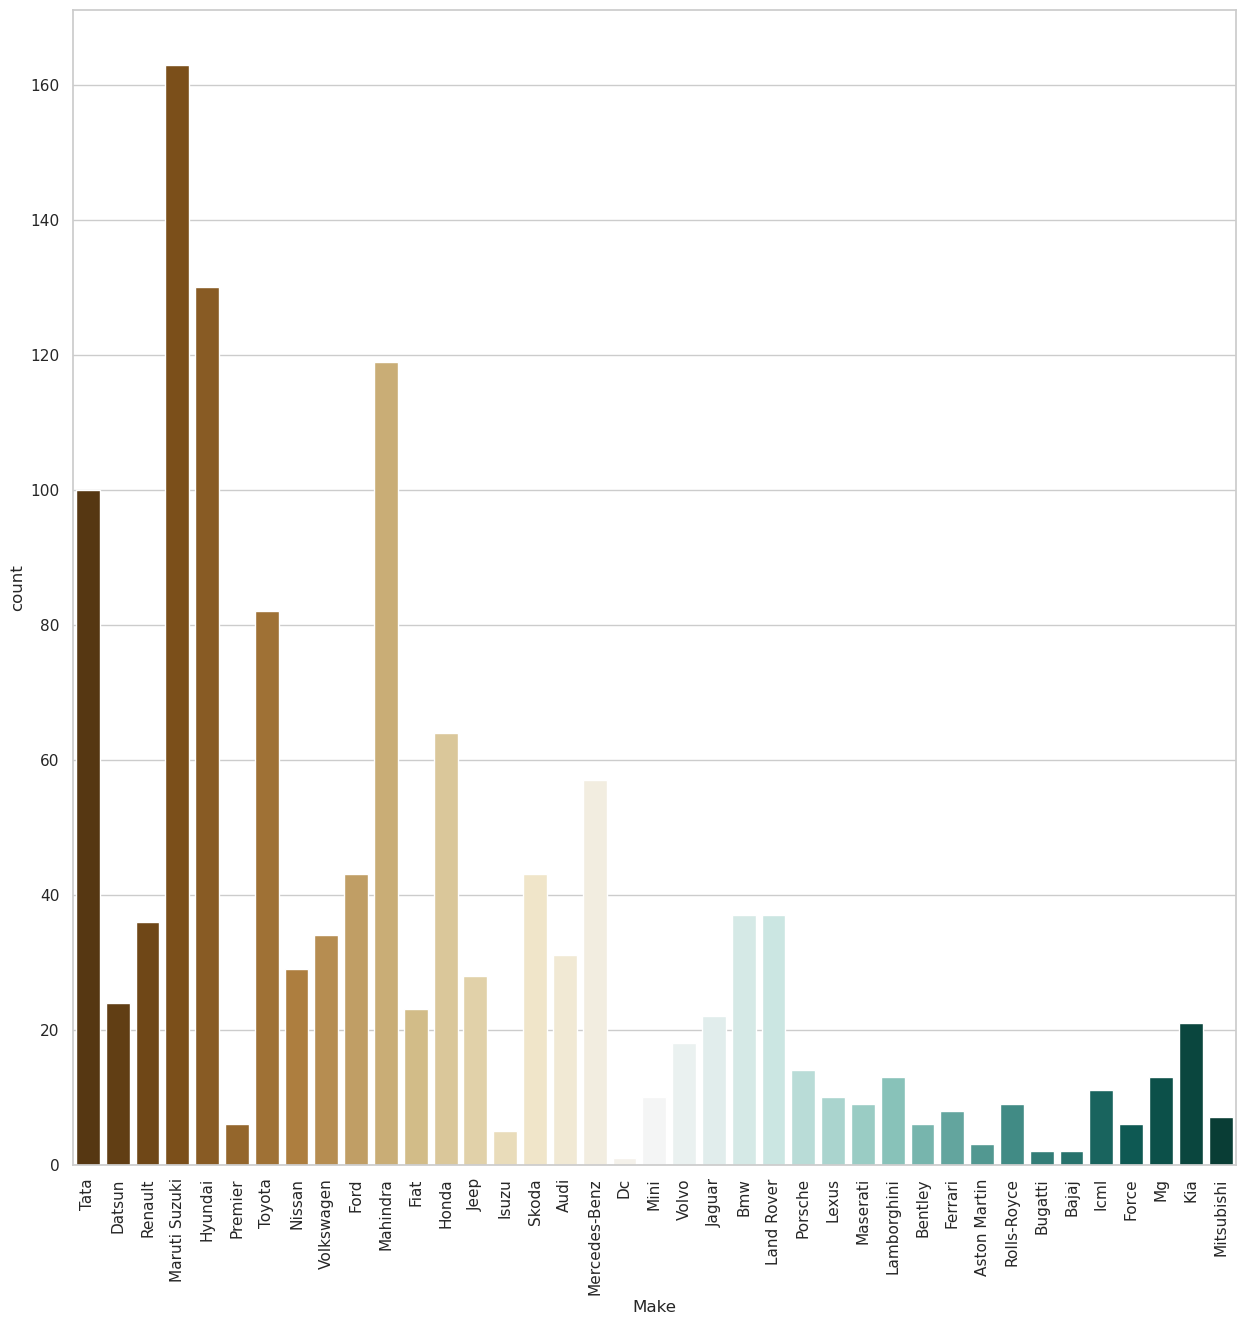

In [82]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.countplot(x="Make",palette='BrBG',data=df)
plt.xticks(rotation=90);

***Insight:***

* Maruti Suzuki is the most popular Make ,followed by Hyundai ,Mahindra,Tata and so on.
* Hyundai has second number of highest cars
* DC has less number of cars
* Skoda and Ford are having equal count,
* Bmw and Renault are having nearly equal count, 

**Top 10 selling car model**

**The below Bar Plot represents the top 10 popular Models of Cars.**
* Nexon is a the top model and a tough competitor of Kuv100 Nxt.
* Compass and Xuv500 are having equal count.
* Seltos and Innova crysta are having equal count.
* Ciaz and Swift are having equal count.

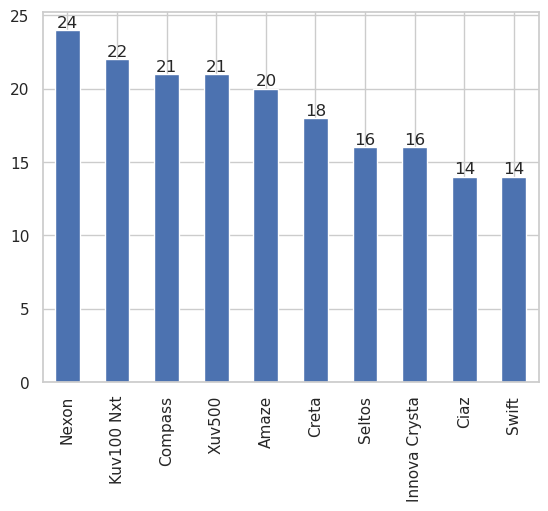

In [83]:
az=df['Model'].value_counts().head(10).plot(kind='bar')
az.bar_label(az.containers[0]);

*Min,Max, and Average price*

In [84]:
df["Price"].agg(["min","max","mean"])

min     2.364470e+05
max     2.121554e+08
mean    4.596538e+06
Name: Price, dtype: float64

**Insight :**
* Minimum price : 2.364470e+05 (i.e 2 lakhs 36 thousands)

* Maximum Price : 2.121554e+08 (i.e 21 crores)

* Average Price : 4.596538e+06 ( i.e 45 lakhs)

**Companies whose price is greater than avg price of the car**

In [85]:
df[df["Price"]>np.mean(df["Price"])][["Price","Model","Make"]].sort_values(by="Price",ascending=False)

,Price,Model,Make
356,212155397.0,Chiron,Bugatti
355,192142937.0,Chiron,Bugatti
1219,95000000.0,Rolls-Royce Phantom,Rolls-Royce
880,83755383.0,Rolls-Royce Drophead Coupe,Rolls-Royce
354,77312661.0,Rolls-Royce Phantom Coupe,Rolls-Royce
...,...,...,...
782,4690000.0,3-Series,Bmw
1034,4670000.0,Mercedes-Benz C-Class,Mercedes-Benz
1038,4654000.0,Mercedes-Benz C-Class,Mercedes-Benz
279,4633000.0,Xe,Jaguar


**Insight :**
* 107 cars having their price is greater than average price i.e 4.596538e+06 and above are the names of those cars.
* Bugatti has the highest above average price i.e. 212155397

<AxesSubplot:xlabel='Price', ylabel='Density'>

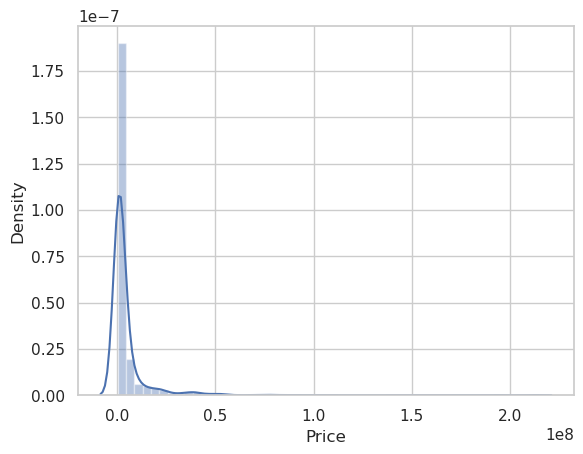

In [86]:
sns.distplot(df["Price"])

**Detail of car having max price**

In [87]:
df[df["Price"]==df["Price"].max()].T

,356
Cylinders,16.0
Doors,2.0
Seating_Capacity,2.0
Number_of_Airbags,6.0
Make,Bugatti
Model,Chiron
Variant,Sport
Price,212155397.0
Displacement,7993.0
Drivetrain,RWD (Rear Wheel Drive)


**Insight :**
* Chiron of bugatti company was the most expensive car with above mentioned features.

**Detail of car having min price**

In [88]:
df[df["Price"]==df["Price"].min()].T

,1
Cylinders,2.0
Doors,5.0
Seating_Capacity,4.0
Number_of_Airbags,2.0
Make,Tata
Model,Nano Genx
Variant,Xe
Price,236447.0
Displacement,624.0
Drivetrain,RWD (Rear Wheel Drive)


**Insight :**
* *Cheapest car was Nano Genx of company Tata with above features details*

In [89]:
len(df[df["Price"]>=df["Price"].mean()])

244

**3.1 Saving the data of above average price in df_a**

In [90]:
df_a=df[df["Price"]>=df["Price"].mean()][["Make","Model","Variant","Price"]]
df_a

,Make,Model,Variant,Price
278,Jaguar,Xe,Se Diesel,4633000.0
279,Jaguar,Xe,Se Petrol,4633000.0
280,Jaguar,Xf,2.0 Prestige,5436329.0
281,Jaguar,Xf,2.0 Portfolio,6073446.0
282,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0
...,...,...,...,...
1253,Porsche,Cayenne Coupe,Base,13151000.0
1254,Porsche,Cayenne Coupe,Turbo,19763000.0
1263,Bentley,Flying Spur,V8,34167064.0
1264,Bentley,Flying Spur,W12,39382083.0


***No of companies having price greater than average price***

In [91]:
df_a["Make"].nunique()

20

**Insight:**
* 20 companies' cars price is greater than average price.

In [92]:
df_a["Make"].value_counts().sort_values(ascending=False)


Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Volvo             9
Rolls-Royce       9
Maserati          9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Toyota            2
Bugatti           2
Ford              1
Nissan            1
Mitsubishi        1
Name: Make, dtype: int64

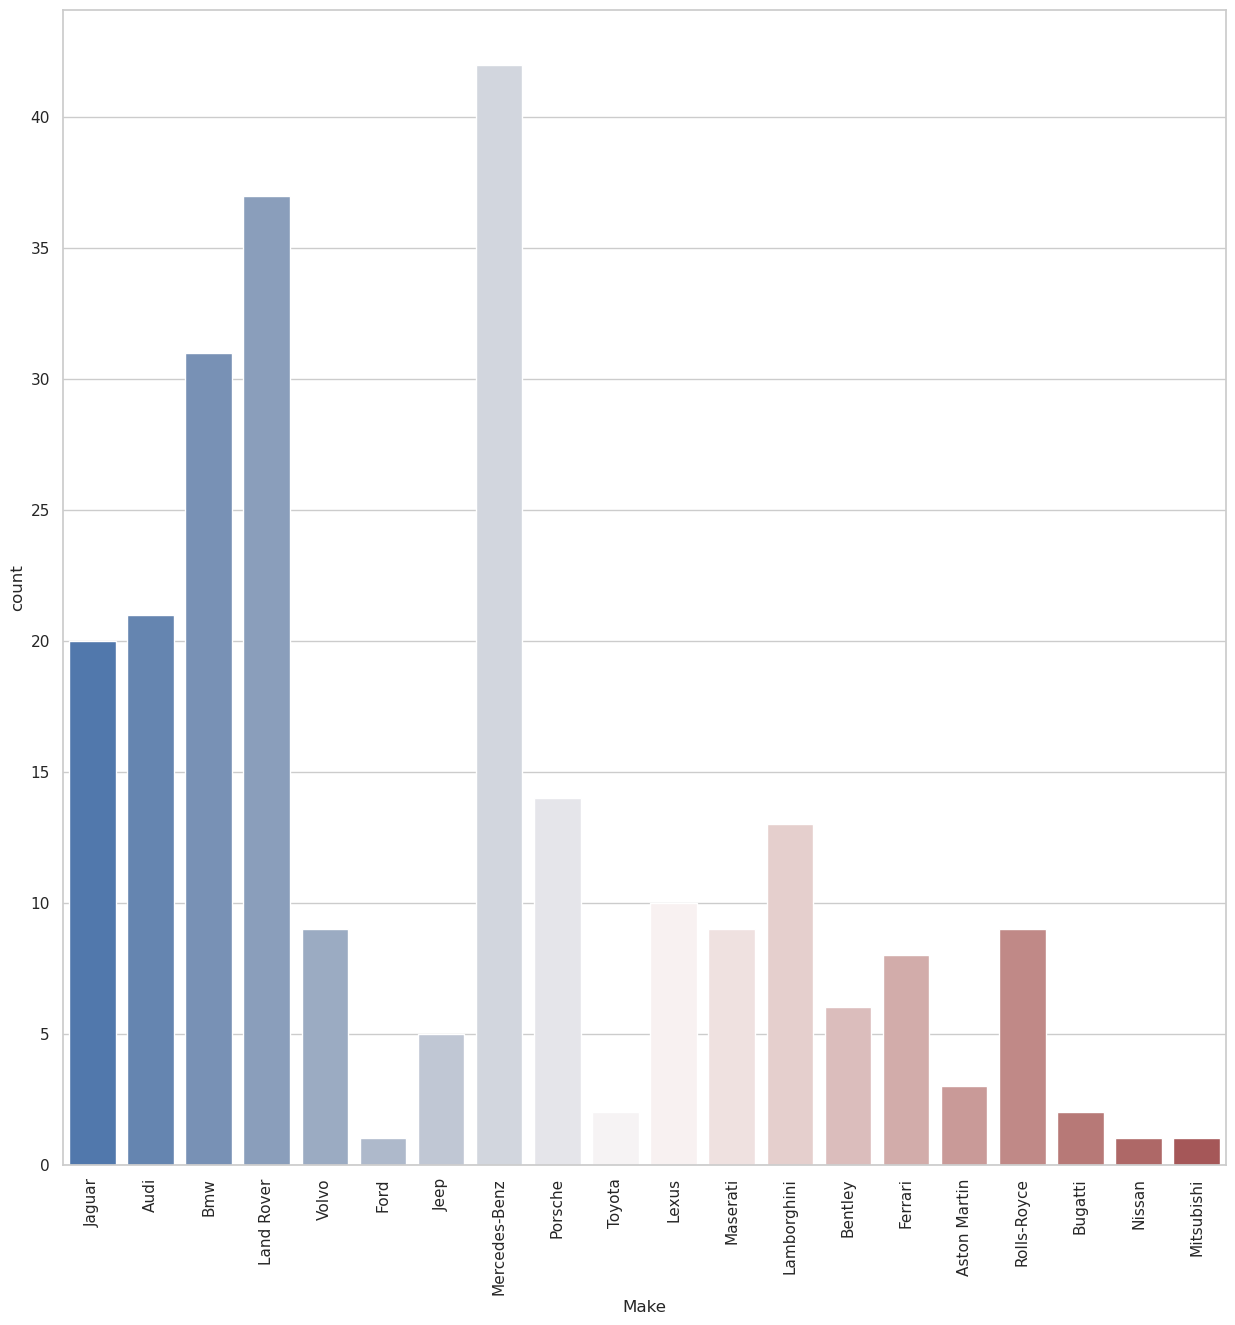

In [93]:
plt.figure(figsize=(15,15))
sns.countplot(x='Make',palette='vlag',data=df_a)
plt.xticks(rotation=90);

* Mercedes-Benz have the highest above average price then Land Rover and Bmw.

**Find out the average price of car whose price is greater than average price of the cars in the data**

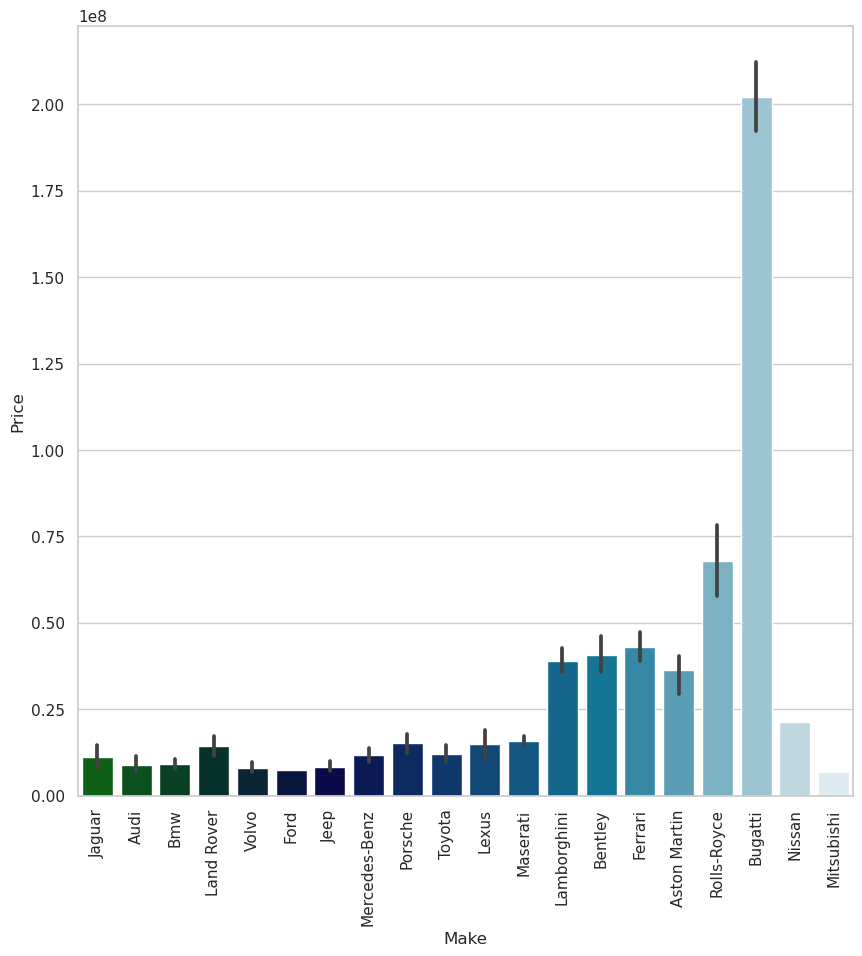

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(x="Make",y="Price",palette='ocean',data=df_a)
plt.xticks(rotation=90);

**Insight :**
* Most Expensive company's car : 
1. Bugati 
2. Rolls-Royce 
3. Ferrari

* Least Expensive company's car : Mitsubishi

**Average price of no of cars whose price is less than avg car price**

In [95]:
len(df[df["Price"]<=df["Price"].mean()])

1032

<AxesSubplot:>

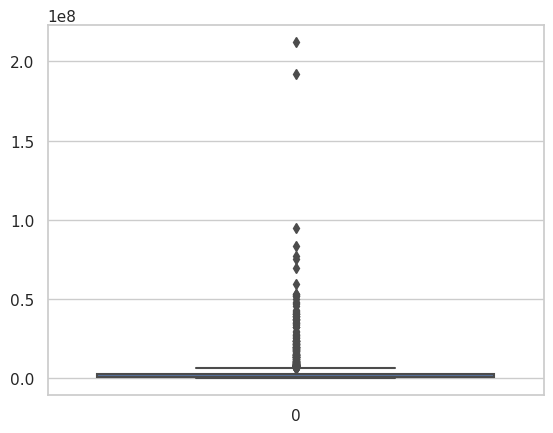

In [96]:
sns.boxplot(df["Price"])

* Variation in Price bcz of outliers.

In [97]:
df[df["Price"]>=150000000]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
355,16.0,2.0,2.0,6.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1479.0,1600.0,Digital,Digital,Digital,Yes,Petrol,5.95,MacPherson Strut,Torsion Beam,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,165.0,350.0,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


* Extreme outliers, we will do analysis without these two cars.

**3.2 Saving the data without extreme outliers in x**

In [98]:
x=df[df["Price"]<=150000000]
x

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.60,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.60,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,23.00,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.90,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.60,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271

In [99]:
x["Price"].mean()

4286408.171114599

**3.3 Correlation of numeric columns w.r.t. price**

In [100]:
df.corr()["Price"]

Cylinders                 0.817001
Doors                    -0.460311
Seating_Capacity         -0.307150
Number_of_Airbags         0.335710
Price                     1.000000
Displacement              0.792404
Power                     0.855190
Torque                    0.702151
ARAI_Certified_Mileage   -0.033971
Ground_Clearance         -0.042823
Boot_Space                0.043589
Name: Price, dtype: float64

<AxesSubplot:>

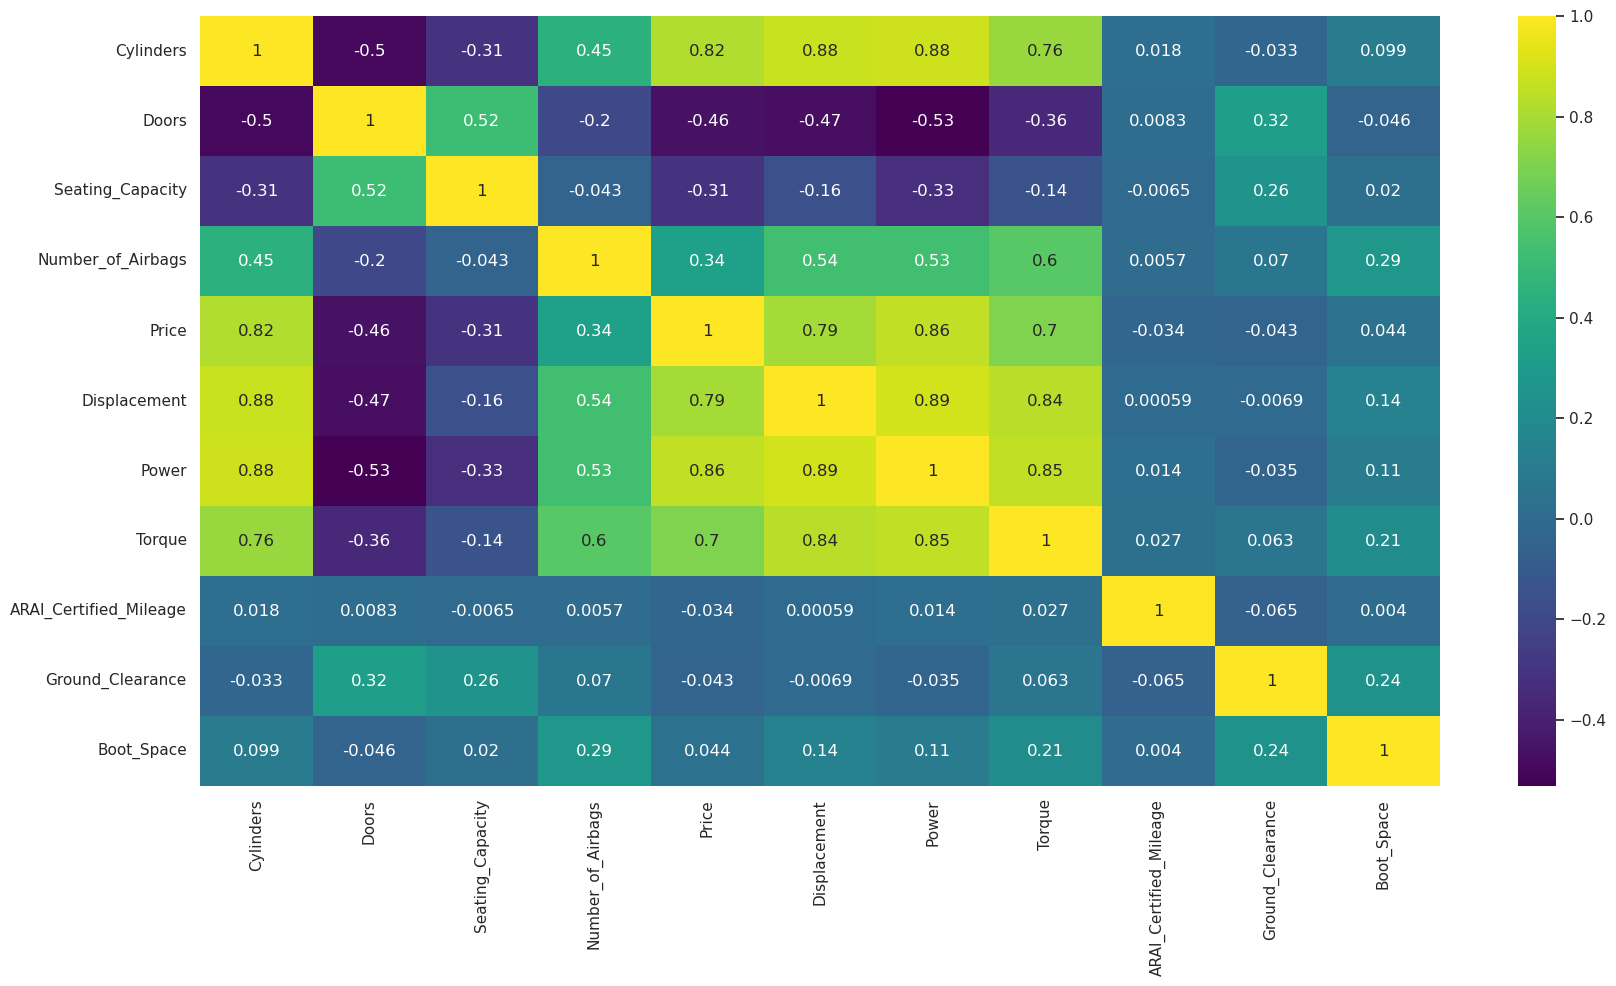

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**Insight:**
* Cylinders, Displacement, Power, and Torque are positively correlated.
* Seating_Capacity is negatively correlated.

**Cylinders,Displacement,Power and Torque are considered important features with respect to car price.**

**3.4 Taking numeric columns and see the relation with Price using scatter plot**

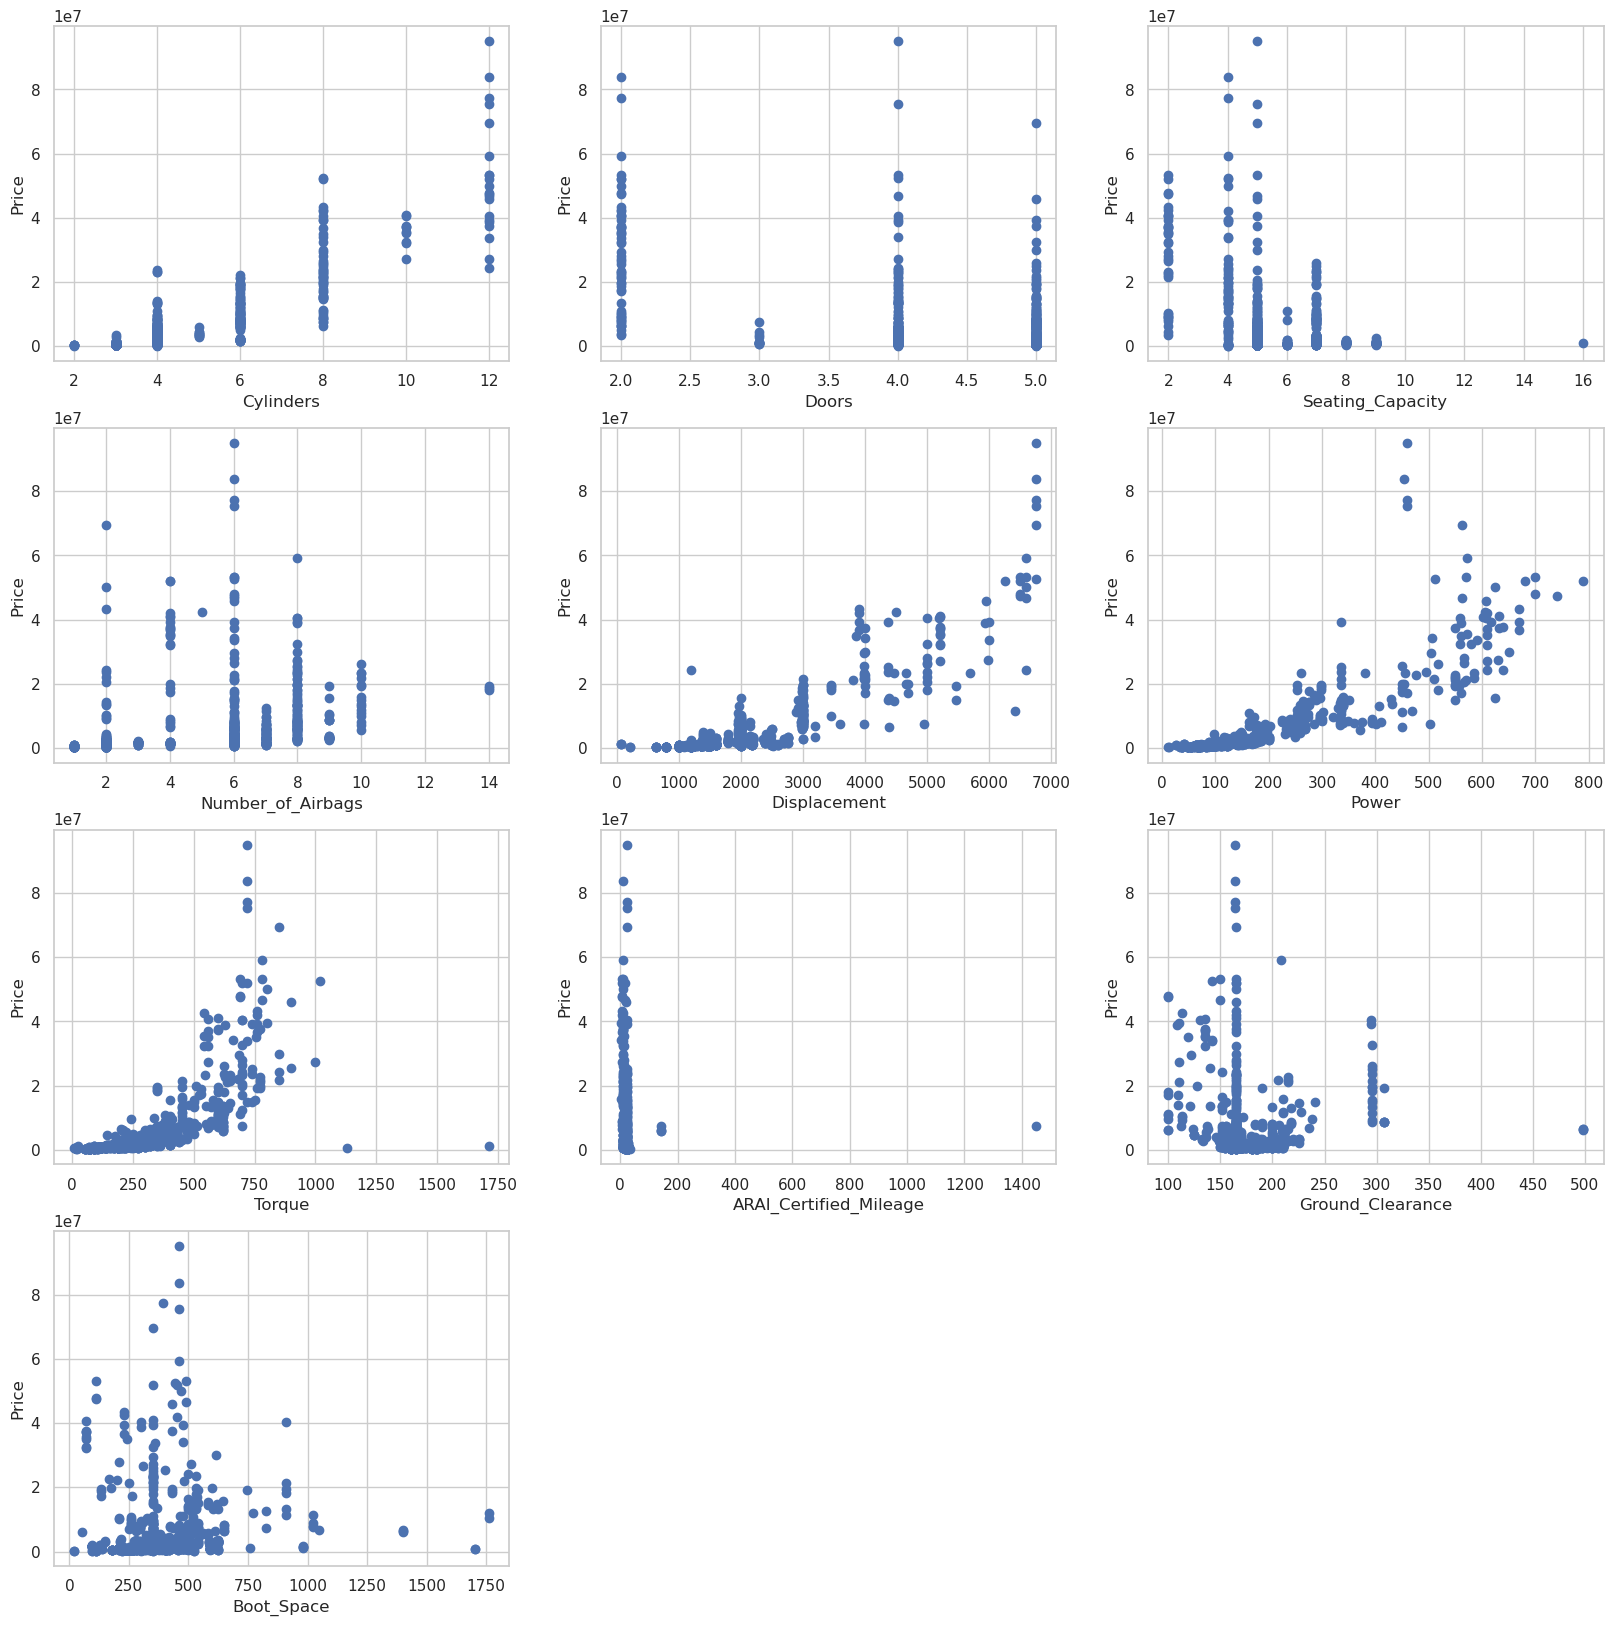

In [102]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(20,20))
for i in x.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(x[i],x["Price"])
        #plt.title(i)
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

**Insight:**
* Price, Cylinders, Doors, and Seating_Capacity(mostly 4-5 seats cars are costlier) don't have linear relationship
* Displacement, Power, and Torque have sort of linear relationship

**Top selling car as per their fuel type**
* The below Bar Plot represents popular Fuel Types of Cars.
* Cars running on Petrol and Diesel are more as compared to those running on CNG,Hybrid,Electric and CNG+Petrol.
* CNG,Hybrid and Electric are having equal count. 

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

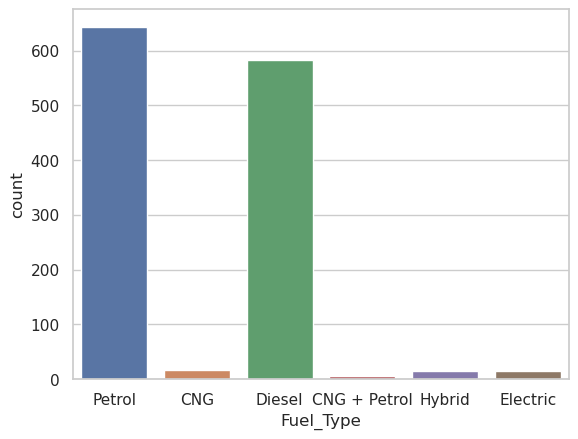

In [103]:
sns.countplot(x='Fuel_Type',data=df)

**How many cars of each company?**

In [104]:
df["Make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Mercedes-Benz     57
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Datsun            24
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Rolls-Royce        9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: Make, dtype: int64

**Insight:**
* Most Demanding companies are Maruti Suzuki, Hyundai, Mahindra, Tata, Toyota.
* Least in Demand is Dc

**Min, Max, and avg Price of the cars based on their company**

In [105]:
df.groupby(["Make"])["Price"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,192142937.0,212155397.0,2.021492e+08
Rolls-Royce,46709733.0,95000000.0,6.779633e+07
Ferrari,35000000.0,52000000.0,4.287250e+07
Bentley,33791059.0,52571294.0,4.056585e+07
Lamborghini,30000000.0,53210327.0,3.905392e+07


**Insight:**
* Top 3 expensive car brands are Bugatti, Rolls-Royce and Ferrari.
* Least expensive car is Bajaj.

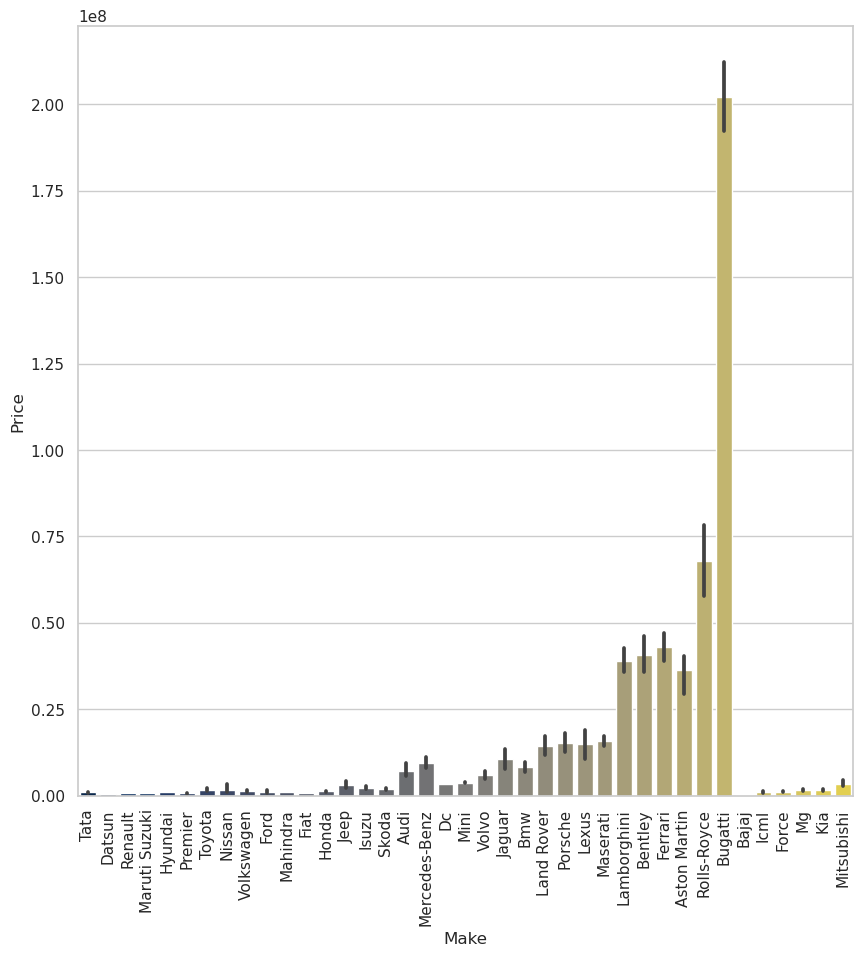

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(x="Make",y="Price",palette='cividis',data=df);
plt.xticks(rotation=90);

**Insight:**

**The average prices of cars from the top three most expensive companies are as follows:**

* Bugatti: The average price of Bugatti cars is high, making them one of the most expensive car brands in the world.
* 
* Rolls-Royce: Rolls-Royce cars are known for their luxury and craftsmanship, and their average prices reflect their premium status in the automobile market.
* 
* Ferrari: Ferrari is a renowned Italian sports car manufacturer, and their cars are known for their performance and exclusivity. The average prices of Ferrari cars are also relatively high compared to other car brands.

**On the other hand, Datsun is known for producing affordable cars, and their average prices are relatively lower compared to luxury car brands like Bugatti, Rolls-Royce, and Ferrari. Datsun cars are designed to be budget-friendly, making them one of the more affordable options for car buyers.**

**Details of Top 3 expensive companies and their cars**

In [107]:
df[((df["Make"]=="Bugatti")|(df["Make"]=="Ferrari")|(df["Make"]=="Rolls-Royce"))].head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
344,8.0,2.0,2.0,4.0,Ferrari,Portofino,V8 Convertible,35000000.0,3855.0,AWD (All Wheel Drive),BS IV,Smart Key,560.0,755.0,Digital,Analog,Analog,Yes,Petrol,9.00,Double wishbone suspension,Multilink,119.0,240.0,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
348,8.0,2.0,2.0,5.0,Ferrari,458 Speciale,Coupe,42531500.0,4497.0,AWD (All Wheel Drive),BS IV,Smart Key,605.0,540.0,Digital,Analog,Analog,Yes,Petrol,9.00,Twin wishbones,multi-link set-up,113.0,230.0,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,not_defined,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
349,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,6.6,46709733.0,6593.0,RWD (Rear Wheel Drive),BS IV,Smart Key,563.0,780.0,Digital,Analog,Analog,Yes,Petrol,17.30,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150.0,490.0,DVD Player with USB & Aux-in,not_defined,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
350,12.0,4.0,5.0,6.0,Rolls-Royce,Rolls-Royce Ghost Series Ii,Ewb,53247201.0,6592.0,RWD (Rear Wheel Drive),BS IV,Smart Key,570.0,780.0,Digital,Analog,Analog,Yes,Petrol,7.29,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150.0,490.0,DVD Player with USB & Aux-in,not_defined,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
351,12.0,2.0,4.0,2.0,Rolls-Royce,Rolls-Royce Wraith,Coupe,50025840.0,6592.0,AWD (All Wheel Drive),BS IV,Smart Key,625.0,800.0,Digital,not_defined,Yes,Yes,Petrol,10.20,Double wishbone,Multi-Link,165.0,470.0,CD Player with USB & Aux-in,not_defined,"Fully automatic climate control, 2 Zone Climat...",not_defined,not_defined,Yes,Yes,Yes,not_defined,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,not_defined,Electric Adjustment with Memory,Yes,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Yes


**Premium Features for Differentiating Top 3 Expensive Cars:**

* Cylinder: Bugatti, Rolls-Royce, and Ferrari cars often feature high-performance engines with a high number of cylinders, such as 12-cylinder or even 16-cylinder engines. These powerful engines provide exceptional performance and acceleration, which can significantly impact the price of the cars.
* 
* Displacement: The displacement of the engine, which refers to the total volume of all cylinders in the engine, is another premium feature that can differentiate expensive cars. Bugatti, Rolls-Royce, and Ferrari cars are known for their large engine displacements, which result in higher horsepower and torque outputs, contributing to their high prices.
* 
* Power: Bugatti, Rolls-Royce, and Ferrari cars are known for their powerful engines that produce high horsepower outputs. These cars often have exceptionally powerful engines that deliver top-tier performance, resulting in higher prices compared to regular cars.
* 
* Torque: Torque, which is the rotational force generated by the engine, is another premium feature that differentiates luxury cars. Bugatti, Rolls-Royce, and Ferrari cars typically have high torque outputs, allowing for quick acceleration and smooth performance at high speeds, which can impact their overall price.

**These premium features, including the high number of cylinders, large engine displacements, powerful engines, and high torque outputs, are some of the factors that contribute to the high prices of Bugatti, Rolls-Royce, and Ferrari cars, making them top-tier luxury automobiles in the market.**

In [108]:
grp=df.groupby(["Make"])["Cylinders","Displacement","Power","Torque"]

In [109]:
grp.get_group("Bugatti")

,Cylinders,Displacement,Power,Torque
355,16.0,7993.0,1479.0,1600.0
356,16.0,7993.0,1600.0,1479.0


* Bugatti has 16 cylinders and highest Displacement, Power and Torque, features for high cost.**

In [110]:
grp.get_group("Rolls-Royce")

,Cylinders,Displacement,Power,Torque
349,12.0,6593.0,563.0,780.0
350,12.0,6592.0,570.0,780.0
351,12.0,6592.0,625.0,800.0
353,12.0,6750.0,563.0,850.0
354,12.0,6749.0,460.0,720.0
879,12.0,6598.0,571.0,780.0
880,12.0,6749.0,453.0,720.0
1219,12.0,6749.0,460.0,720.0
1220,12.0,6749.0,460.0,720.0


* Rolls-Royce has 12 cylinders and second highest Displacement, Power and Torque.

In [111]:
grp.get_group("Ferrari")

,Cylinders,Displacement,Power,Torque
344,8.0,3855.0,560.0,755.0
348,8.0,4497.0,605.0,540.0
872,8.0,3902.0,670.0,760.0
873,8.0,3902.0,670.0,760.0
874,8.0,3900.0,610.0,760.0
875,8.0,6262.0,681.0,697.0
1058,12.0,6496.0,789.0,718.0
1172,8.0,3902.0,669.0,760.0


* Ferrari has 8 and 12 cylinders and third highest Displacement, Power and Torque**

**Insight:**
* Bugatti, Rolls-Royce, and Ferrari are the top three most expensive cars.
* Bugatti has the highest number of cylinders, contributing to its performance and speed.
* Rolls-Royce is renowned for luxury and comfort, with advanced technology features.
* Ferrari is known for high-performance engines and racing heritage.
* Brand reputation, exclusivity, craftsmanship, and customer perception also influence pricing.
* These factors make these luxury cars desirable among collectors and enthusiasts.

**3.6 Buyers can consider the following key features when choosing a car:**

* Safety----No of airbags: Check the number of airbags provided in the car to ensure adequate protection in case of an accident.

* Power: Look for the horsepower and performance capabilities of the car's engine to suit your driving needs and preferences.

* Torque: Consider the torque, which determines the car's pulling power, especially for off-road or towing requirements.

* Mileage: Check the fuel efficiency or mileage of the car to estimate its running costs and environmental impact.

*  Seating Capacity: Consider the number of passengers the car can comfortably accommodate, based on your requirements for family or group travel.

* Fuel Type: Choose between gasoline, diesel, hybrid, or electric, depending on your preference for fuel efficiency, environmental impact, and driving needs.

**Considering these important features can help buyers make an informed decision when choosing a car that best meets their safety, performance, efficiency, and seating requirements, as well as their fuel preferences.**

***Number_of_Airbags***

**Average Number_of_Airbags available in car by top companies**

In [112]:
x1=df.groupby(["Make"])["Number_of_Airbags"].mean().sort_values(ascending=False).head()

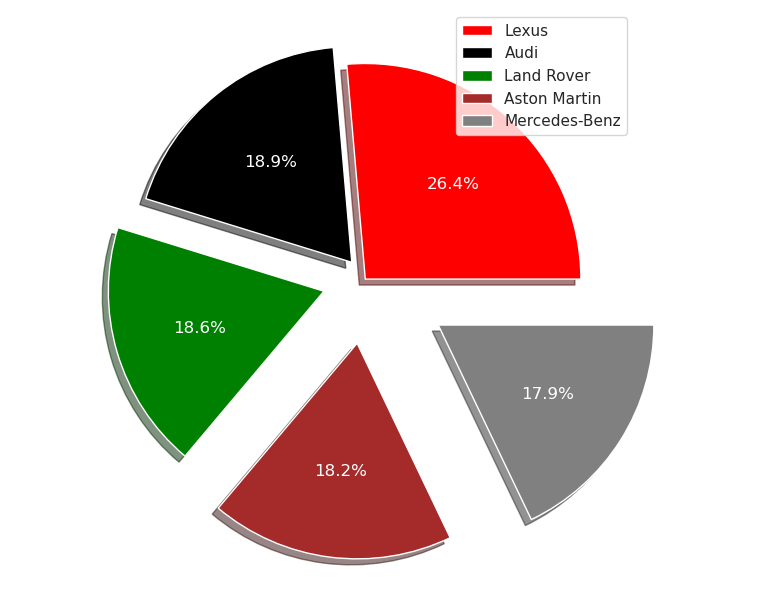

In [113]:
plt.figure(figsize=(10,7))
labels = ["Lexus","Audi","Land Rover","Aston Martin","Mercedes-Benz"]
plt.pie(x=x1,data=df,colors=['red','black','Green','brown','grey'],shadow=True,labels=labels,explode=(0,0.1,0.2,0.3,0.4),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

**Maximum,minimum and average air bags a company can give**

In [114]:
df.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Lexus,8.0,14.0,10.600000
Audi,4.0,10.0,7.580645
Land Rover,2.0,10.0,7.486486
Aston Martin,6.0,8.0,7.333333
Mercedes-Benz,2.0,10.0,7.192982


**Insight :**
**According to safety point of view top 3 companies :**

1- Lexus

2- Audi

3- land rover

**Found to be good company cars which provides average 10.6, 7.58 , 7.48 number of air bags repectively.**

***Power***

**Average power produce in car by top companies**

In [115]:
x2=df.groupby(["Make"])["Power"].mean().sort_values(ascending=False).head()

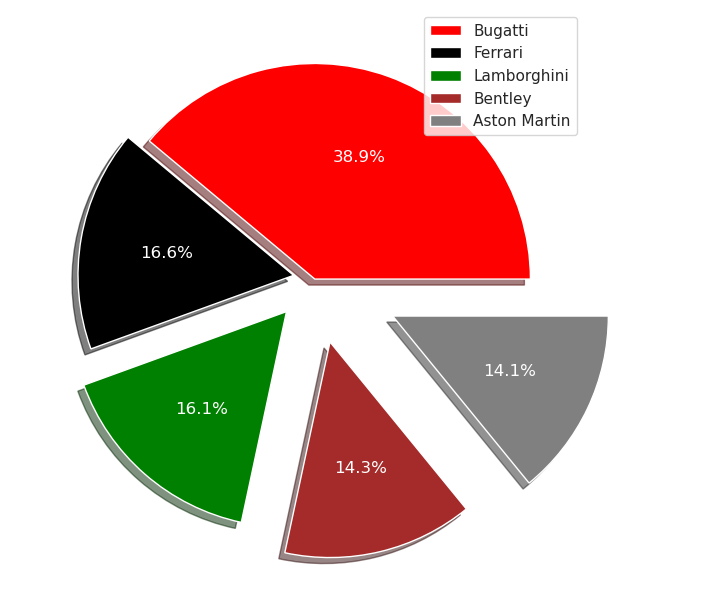

In [116]:
plt.figure(figsize=(10,7))
labels = ["Bugatti","Ferrari","Lamborghini","Bentley","Aston Martin"]
plt.pie(x=x2,data=df,colors=['red','black','Green','brown','grey'],shadow=True,labels=labels,explode=(0,0.1,0.2,0.3,0.4),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

**Max,min and average power a company can give**

In [117]:
df.groupby(["Make"])["Power"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,1479.0,1600.0,1539.500000
Ferrari,560.0,789.0,656.750000
Lamborghini,571.0,740.0,636.461538
Bentley,507.0,616.0,563.833333
Aston Martin,505.0,608.0,557.666667


**Insight :**

**According to Power point of view top 4 companies :**

1- Bugatti

2- Ferrari

3- Lamborghini

4- Bentley

**Found to be good company cars which provides average power 1539.5, 656.75, 636.46 , 563.83 repectively.**

**Torque**

**Average Torque produce in car by top companies**

In [118]:
x3=df.groupby(["Make"])["Torque"].mean().sort_values(ascending=False).head()

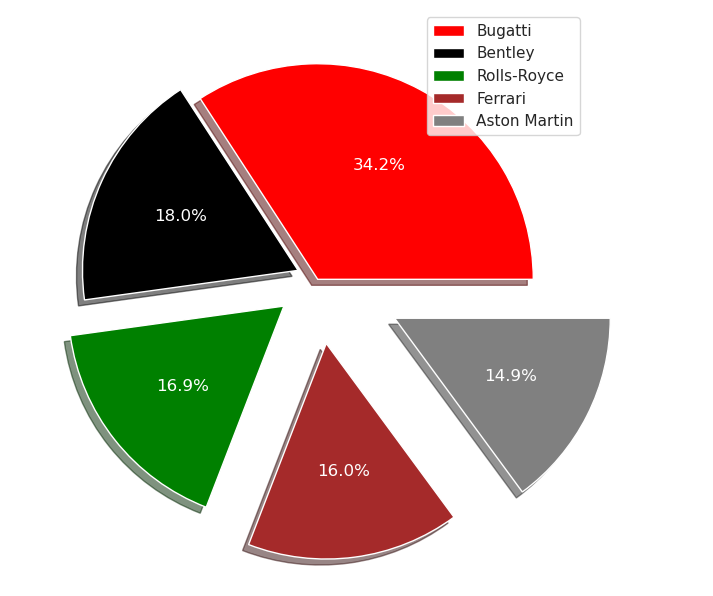

In [119]:
plt.figure(figsize=(10,7))
labels = ["Bugatti","Bentley","Rolls-Royce","Ferrari","Aston Martin"]
plt.pie(x=x3,data=df,colors=['red','black','Green','brown','grey'],shadow=True,labels=labels,explode=(0,0.1,0.2,0.3,0.4),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

**Max,min and average Torque of each company**

In [120]:
df.groupby(["Make"])["Torque"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Bugatti,1479.0,1600.0,1539.500000
Bentley,660.0,1020.0,811.666667
Rolls-Royce,720.0,850.0,763.333333
Ferrari,540.0,760.0,718.750000
Aston Martin,630.0,700.0,671.666667


**Insight :**

**According to Torque point of view top 4 companies :**

1- Bugatti

2- Bentley

3- Rolls-Royce

4- Ferrari

**Found to be good company cars which provides average torque 1539.5, 811.6, 763.33, 718.75 repectively.**

***Seating_Capacity***

**Average Torque produce in car by top companies**

In [121]:
x4=df.groupby(["Make"])["Seating_Capacity"].mean().sort_values(ascending=False).head()

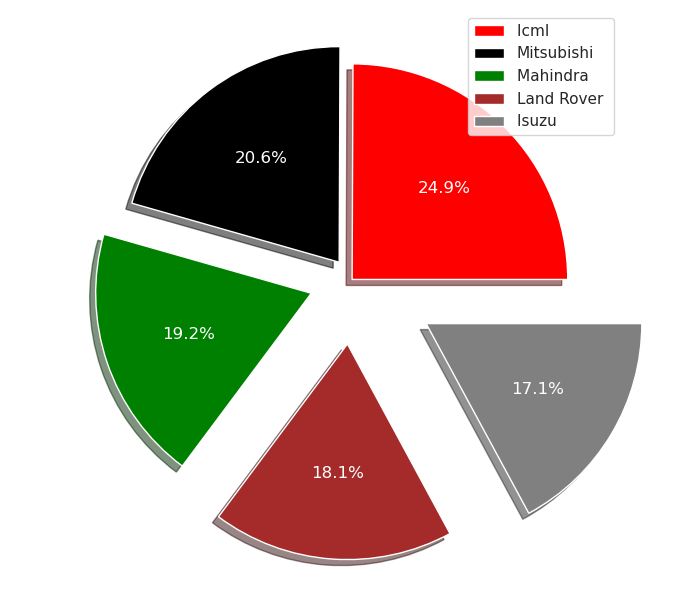

In [122]:
plt.figure(figsize=(10,7))
labels = ["Icml ","Mitsubishi","Mahindra ","Land Rover ","Isuzu "]
plt.pie(x=x4,data=df,colors=['red','black','Green','brown','grey'],shadow=True,labels=labels,explode=(0,0.1,0.2,0.3,0.4),textprops={"color":"w"},autopct='%.1f%%')
plt.legend(loc="upper right");

**Max,min and average seating capacity of each company**

In [123]:
df.groupby(["Make"])["Seating_Capacity"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Icml,7.0,9.0,8.454545
Mitsubishi,7.0,7.0,7.000000
Mahindra,4.0,9.0,6.512605
Land Rover,4.0,7.0,6.135135
Isuzu,5.0,7.0,5.800000


**Insight :**

**According to seating_capacity point of view top 3 companies :**

1- Icml : 8 seater

2- Mitsubishi : 7 seater

3- Mahindra : 6 seater

***ARAI_Certified_Mileage***

***Max,min and average Mileage of each company***

In [124]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).head()

,min,max,mean
Make,,,
Mercedes-Benz,7.8,1449.00,48.901754
Bajaj,23.0,35.00,29.000000
Maruti Suzuki,11.9,28.40,22.531534
Honda,14.4,27.40,21.362500
Datsun,20.1,25.17,21.353333


**From above we can see The company Mercedes-Benz gives maximum mileage : 142 which is not possible there might be typing mistake it might be 14.2**

In [125]:
df[(df["ARAI_Certified_Mileage"]==142.0)]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
794,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E350 D,7285332.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
795,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D,5964321.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
799,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D Expression,5850000.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes
800,6.0,4.0,5.0,7.0,Mercedes-Benz,Mercedes-Benz E-Class,E220D Exclusive,6250000.0,2987.0,RWD (Rear Wheel Drive),BS IV,Smart Key,268.0,620.0,Analog,Analog,Analog,Yes,Diesel,142.0,"McPhersons axle with coil spring Coil springs,...",Multi link independent suspensions with coil s...,155.0,540.0,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,3 Zone climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Semi Automatic Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,not_defined,Yes,Yes


**The entries are found at index number 794,795,799 and 800 so we correct it with 14.2:**

In [126]:
df.loc[794,"ARAI_Certified_Mileage"]=14.2
df.loc[795,"ARAI_Certified_Mileage"]=14.2

df.loc[799,"ARAI_Certified_Mileage"]=14.2
df.loc[800,"ARAI_Certified_Mileage"]=14.2

In [127]:
df.loc[794,"ARAI_Certified_Mileage"]

14.2

**The entries have been rectified now compute the max,min average again.**

In [128]:
df.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["max","min","mean"]).sort_values(by="mean",ascending=False)

,max,min,mean
Make,,,
Mercedes-Benz,1449.00,7.80,39.933333
Bajaj,35.00,23.00,29.000000
Maruti Suzuki,28.40,11.90,22.531534
Honda,27.40,14.40,21.362500
Datsun,25.17,20.10,21.353333
Mg,23.00,17.41,21.280000
Ford,26.10,10.91,21.145349
Tata,27.28,14.00,20.927800
Renault,25.17,13.86,20.630000


**Insight :**

**According to ARAI_Certified_Mileage point of view top 3 companies :**

1- Bajaj

2- Maruti Suzuki

3- Honda

In [129]:
dk=df[df['Make']!='Mercedes-Benz']

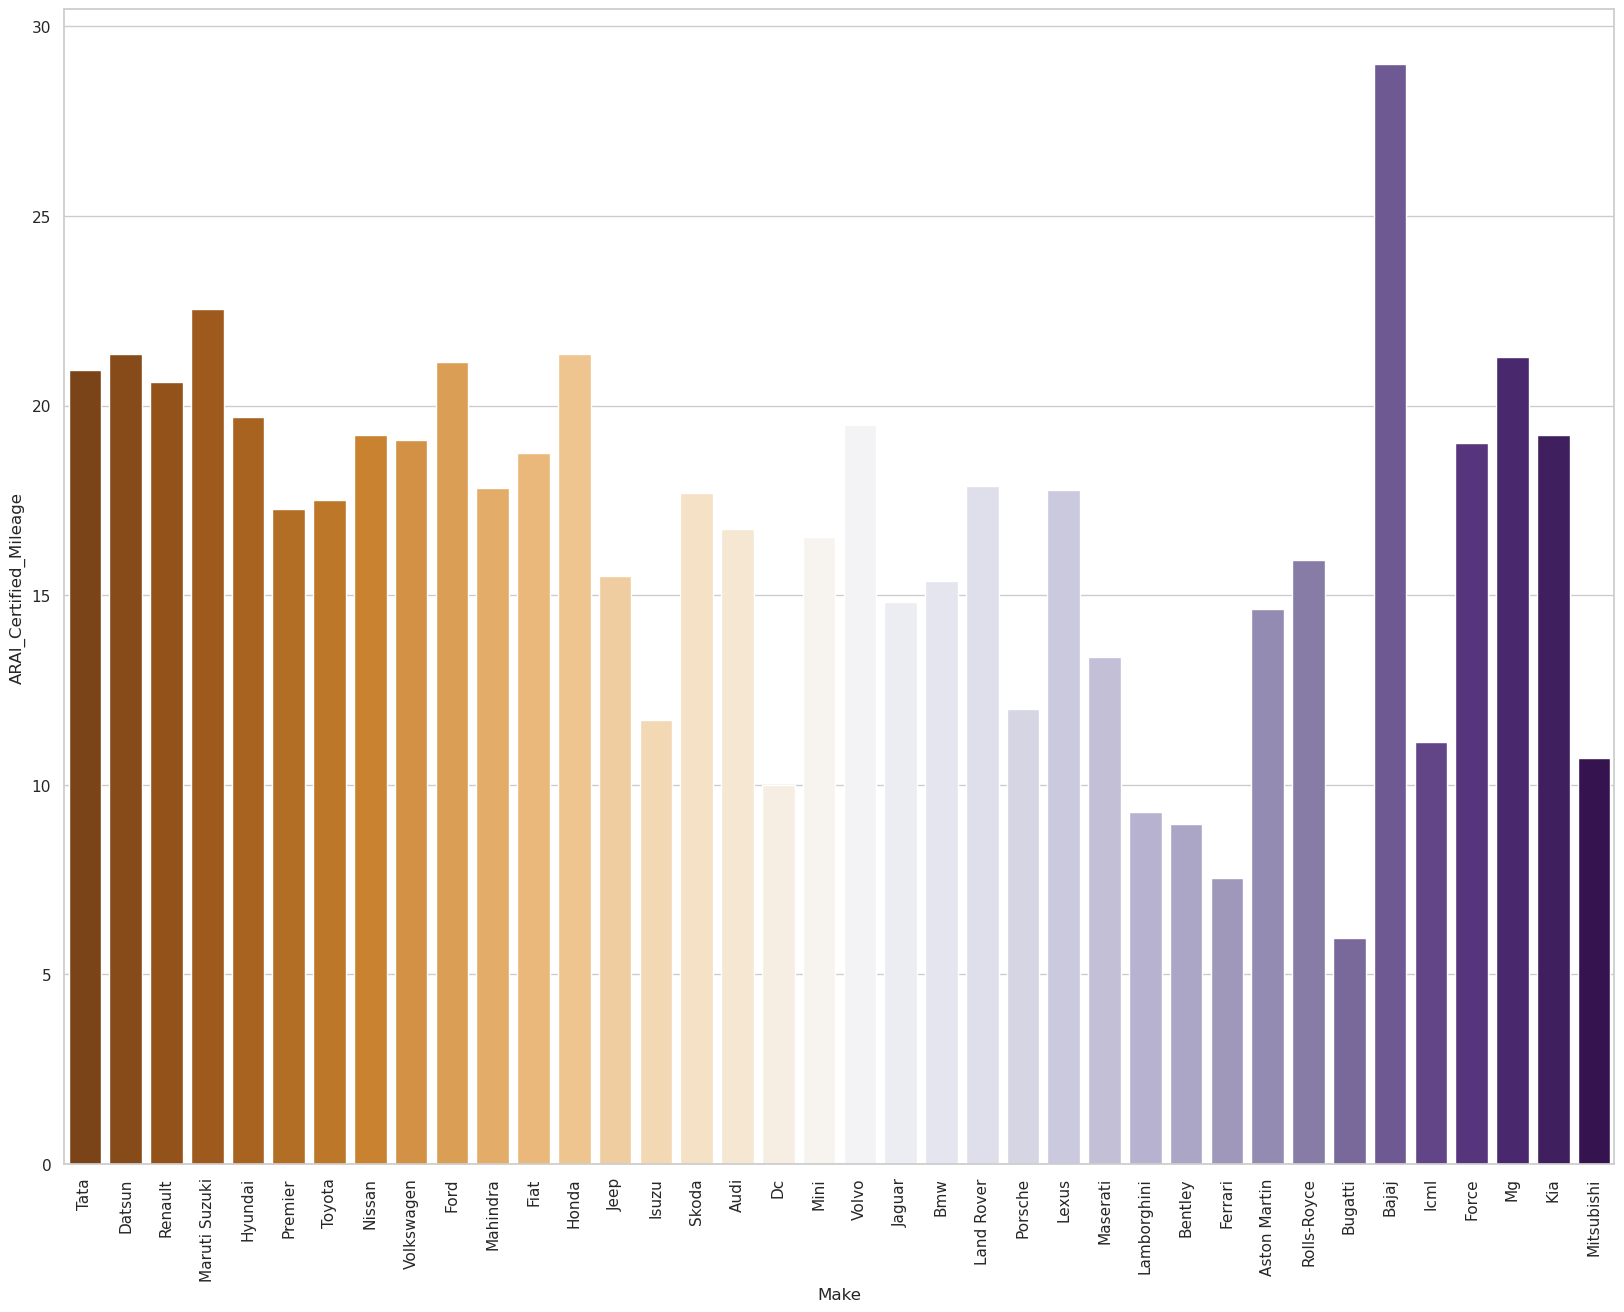

In [130]:
plt.figure(figsize=(20,15))
sns.barplot(x='Make',y='ARAI_Certified_Mileage',palette='PuOr',ci=None,data=dk,)
plt.xticks(rotation=90);


**Found to be good company cars which provides average ARAI_Certified_Mileage 29, 22.5 , 21.3 repectively.**

***Fuel_type***

In [131]:
df["Fuel_Type"].value_counts()

Petrol          643
Diesel          582
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

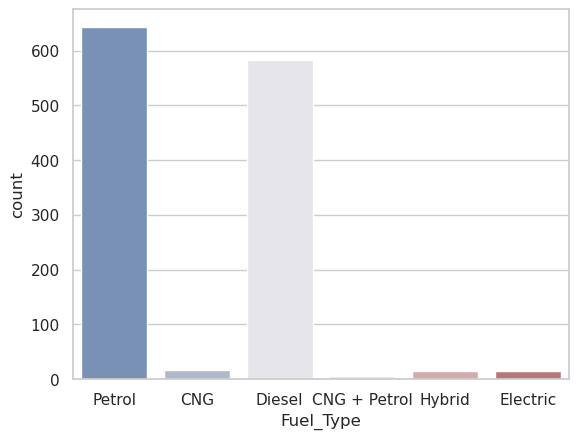

In [132]:
sns.countplot(x='Fuel_Type', data=df, palette='vlag')

**Customers preferred Petrol fuel_type.**

In [133]:
g_f=df.groupby(["Make"])["Fuel_Type"]
g_f

In [134]:
#for i in df["Make"]:
    #print(i,"\n",g_f.get_group(i).values)

**Extra Features**

**Taking those features having only two unique values (yes or no) and we will treat them as extra features.**

In [135]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features

['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

**df2 having extra features with company name and price**

In [136]:
df2=df[extra_features]
df2 

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility,Model
0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
1,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
2,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined,Nano Genx
3,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Nano Genx
4,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1272,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1273,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1274,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,Yes,Honda,1201000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City


**We will compare with Model not Make**


**Making copy of df2 and save it to df3 having extra features and setting model as index.**

In [137]:
df3=df2.copy()
df3.set_index("Model",inplace=True)
df3


,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility
Model,,,,,,,,,,,,,,,,,,
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes


**Zipping of model name with their corresponding column values**

In [138]:
for i,j in zip(df3.index,df3.values):
    print(i,"-------------",j)

Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 292667.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 236447.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 296661.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Yes' 'Yes' 'not_defined'
 'not_defined']
Nano Genx ------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 334768.0 'not_defined'
 'not_defined' 'not_defined' 'Yes' 'not_d

**Counting the number of yes features a model has along with its price.**

In [139]:
for i,j in zip(df3.index,df3.values):
    c=0
    l=[]
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print("Model--------",i,",--------Count------",c,",---------Price-------",j[9])

Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 292667.0
Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 236447.0
Model-------- Nano Genx ,--------Count------ 2 ,---------Price------- 296661.0
Model-------- Nano Genx ,--------Count------ 1 ,---------Price------- 334768.0
Model-------- Nano Genx ,--------Count------ 0 ,---------Price------- 272223.0
Model-------- Nano Genx ,--------Count------ 1 ,---------Price------- 314815.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 279650.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 351832.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 333419.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 362000.0
Model-------- Redi-Go ,--------Count------ 0 ,---------Price------- 390000.0
Model-------- Redi-Go ,--------Count------ 1 ,---------Price------- 437065.0
Model-------- Kwid ,--------Count------ 4 ,---------Price-------

**Insight :**

**From above output we can see price increases with increase number of features and those models which have different price on same number of features where other factors like torque , power matters like nano genx cars' etc.**


**Not much of a relation of Price with these features as we can see, with some model price increases and with some model its decreases.**

# **Step 4 : Data Preparation**

In [140]:
df.shape

(1276, 49)

**Remaining rows and columns**
* Rows : 1276
* Columns : 49

**We will use Mean Target encoding,and its drawback is Data Leakage(Overfitting) and for overfitting we will use cross validation.**

**Mean Target encoding can cause data leakage, leading to overfitting. Cross-validation is a technique used to mitigate overfitting by evaluating the model on unseen data during training. Careful analysis and experimentation are needed to determine the best approach for your specific use case.**

**4.1 Dropping irrelevant features from ML POV.**

In [141]:
df.drop(columns=["Make","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Key_Off_Reminder","Cooled_Glove_Box","Gear_Shift_Reminder","Rain_Sensing_Wipers","Seat_Height_Adjustment","Adjustable_Steering_Column","Rear_Center_Armrest"],inplace=True)

In [142]:
df.shape

(1276, 34)

4.2 Encoding

**Remaining rows and columns**

* Rows : 1276
* Columns : 34

**4.2 Encoding**
* *Label Encoding for Yes/NO values:*

In [143]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df[i].replace({"Yes":1,"not_defined":0},inplace=True)
df.head(3)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Petrol,23.6,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Petrol,23.6,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,CNG,23.0,180.0,110.0,1,1,0,0,0,not_defined,0,0,0,0,0,0,0,0,0


**4.2.1 ENCODING of the remaining columns**

In [144]:
df["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [146]:
df["Drivetrain"]=df["Drivetrain"].replace({"RWD (Rear Wheel Drive)":0,"FWD (Front Wheel Drive)":1,"AWD (All Wheel Drive)":2,"4WD":3})

In [147]:
df["Emission_Norm"].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [148]:
df["Emission_Norm"]=df["Emission_Norm"].replace("BS 6","BS VI")

In [149]:
df["Emission_Norm"]=df["Emission_Norm"].replace({'BS III':0,'BS IV':1, 'BS VI':2})

In [150]:
df["Keyless_Entry"].unique()

array(['Remote', 'not_defined', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [151]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [152]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({'not_defined':0,'Remote':1, 'Yes':2, 'Smart Key':3,'Smart Key, Remote':4})

In [153]:
df["Odometer"].unique()

array(['Digital', 'Analog', 'not_defined', 'Digital, Analog', 'Yes'],
      dtype=object)

In [154]:
df["Odometer"]=df["Odometer"].replace({'not_defined':0,'Digital':1, 'Analog':2, 'Digital, Analog':3, 'Yes':4})

In [155]:
df["Speedometer"].unique()

array(['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog',
       'not_defined', 'Yes'], dtype=object)

In [156]:
df["Speedometer"]=df["Speedometer"].replace( 'Digital, Analog','Analog, Digital')

In [157]:
df["Speedometer"]=df["Speedometer"].replace({'Analog':0, 'Digital':1, 'Analog, Digital':2,'not_defined':3, 'Yes':4})

In [158]:
df["Fuel_Type"]=df["Fuel_Type"].replace({"Petrol":0,"CNG":1,"Diesel":2,"CNG + Petrol":3,"Hybrid":4,"Electric":5})

In [159]:
df["Parking_Assistance"].unique()

array(['not_defined', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera',
       'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Front sensors, Rear sensors', 'Rear sensors, Front sensors',
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

In [160]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})

In [161]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({'not_defined':0, 'Rear sensors':1, 'Rear sensors with camera':2,
                                                           'Front and rear sensors with camera':3,
                    'Yes':4, 'Front & rear sensors with 360 degree view':5,'Rear sensors, Front sensors':6})

In [162]:
df.shape

(1276, 34)

**4.2.2 We will apply Mean Target Encoding on Model and Variant.**

In [163]:
df2=df.groupby(["Model"])["Price"].agg(["mean"]).reset_index()
df2.head()

,Model,mean
0,3-Series,4.540000e+06
1,458 Speciale,4.253150e+07
2,458 Spider,4.336750e+07
3,488 Gtb,3.804048e+07
4,5-Series,6.196667e+06


**Model**

In [164]:
l=[]
for i in df["Model"]:
    for j,k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])

In [165]:
print(l)

[291263.5, 291263.5, 291263.5, 291263.5, 291263.5, 291263.5, 358994.3333333333, 358994.3333333333, 358994.3333333333, 358994.3333333333, 358994.3333333333, 358994.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 427923.3333333333, 403397.6, 403397.6, 403397.6, 403397.6, 403397.6, 403006.8333333333, 403006.8333333333, 403006.8333333333, 403006.8333333333, 403006.8333333333, 403006.8333333333, 512183.22222222225, 512183.22222222225, 512183.22222222225, 512183.22222222225, 512183.22222222225, 512183.22222222225, 512183.22222222225, 512183.22222222225, 512183.22222222225, 451557.0, 451557.0, 529052.5, 529052.5, 529052.5, 529052.5, 529052.5, 529052.5, 529052.5, 529052.5, 586000.0, 586000.0, 586000.0, 586000.0, 586000.0, 586000.0, 586000.0, 586000.0, 516714.125, 516714.125, 516714.125, 516714.125, 516714.125, 516714.125, 5

In [166]:
df["Model"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,Xt,292667.0,624.0,0,1,1,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,Xe,236447.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,Emax Xm,296661.0,624.0,0,1,0,38.0,51.0,1,0,1,23.0,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,Xta,334768.0,624.0,0,1,1,38.0,51.0,1,0,0,21.9,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,Xm,272223.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Variant**

In [167]:
df2=df.groupby(["Variant"])["Price"].agg(["mean"]).reset_index()
df2.head()

,Variant,mean
0,1.0 S,390000.0
1,1.0 S Amt,437065.0
2,1.0 Turbo Gdi Dct S,940000.0
3,1.0 Turbo Gdi Dct Sx Plus,1115500.0
4,1.0 Turbo Gdi Mt S,826000.0


In [168]:
l=[]
for i in df["Variant"]:
    for j,k in df2.iterrows():
        if i==k["Variant"]:
            l.append(k["mean"])

In [169]:
print(l)

[292667.0, 465723.5, 296661.0, 334768.0, 813741.0, 572407.5, 327320.0, 452306.6666666667, 401704.5, 12957880.857142856, 390000.0, 437065.0, 353290.0, 283290.0, 383290.0, 413290.0, 433290.0, 454490.0, 463290.0, 484490.0, 440990.0, 470990.0, 462190.0, 492190.0, 352136.0, 380573.0, 392967.0, 466057.0, 425255.0, 490423.6666666667, 527564.8888888889, 616345.0, 453203.25, 439777.0, 481316.5, 327320.0, 452306.6666666667, 502492.0, 499990.0, 401704.5, 528464.0, 553015.0, 594464.0, 618015.0, 422444.0, 480670.0, 429990.0, 503990.0, 547990.0, 530990.0, 512990.0, 578990.0, 570990.0, 556490.0, 517500.0, 520000.0, 610000.0, 649000.0, 610000.0, 620000.0, 699000.0, 660000.0, 453203.25, 527564.8888888889, 634770.0, 481316.5, 663554.2, 540350.0, 633867.5, 552350.0, 713898.0, 666898.0, 607841.0, 560841.0, 483320.0, 630320.0, 583320.0, 495000.0, 559000.0, 609000.0, 663000.0, 584666.6666666666, 692253.0, 670000.0, 603000.0, 616345.0, 739000.0, 713100.0, 806760.0, 716166.6666666666, 4350850.0, 816700.0, 776

In [170]:
df["Variant"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,292667.0,292667.0,624.0,0,1,1,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,465723.5,236447.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,296661.0,296661.0,624.0,0,1,0,38.0,51.0,1,0,1,23.0,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,334768.0,334768.0,624.0,0,1,1,38.0,51.0,1,0,0,21.9,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,813741.0,272223.0,624.0,0,1,0,38.0,51.0,1,0,0,23.6,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Step 5 : Data Modelling and Evaluation**

****5.1 Checking shape of data****

In [171]:
df.shape

(1276, 34)

**5.2 Checking that all the columns are of numeric type**

In [172]:
df.dtypes

Cylinders                                    float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Model                                        float64
Variant                                      float64
Price                                        float64
Displacement                                 float64
Drivetrain                                     int64
Emission_Norm                                  int64
Keyless_Entry                                  int64
Power                                        float64
Torque                                       float64
Odometer                                       int64
Speedometer                                    int64
Fuel_Type                                      int64
ARAI_Certified_Mileage                       float64
Ground_Clearance                             float64
Boot_Space                                   f

**5.3 Seggregate x and y**

In [173]:
x=df.drop(columns=["Price"])
y=df["Price"]

**5.4 Scaling(Standard Scaler), required for linear and KNN.**

In [174]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

**Bcz of Mean Target, chances of overfitting that's why we used cross validation**

In [175]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

**5.5 We will compare different Supervised learning models and compare the results based on r square metric and choose the one which is more efficient .**

In [176]:
lr=LinearRegression()

In [177]:
knn=KNeighborsRegressor()

In [178]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores=cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score

[0.9718349130747809, 0.8597374465115039]

In [179]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()

In [180]:
Model=[dtc,rfr,gbr,xgb,adb]

In [181]:
for i in Model:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores=cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r=np.mean(scores)
    r2score.append(r)

In [182]:
r2score

[0.9718349130747809,
 0.8597374465115039,
 0.971167081034016,
 0.9615820174944698,
 0.9798852802435146,
 0.9826580015919089,
 0.8856204651242372]

In [183]:
Model_names=["LinearRegression","KNN","DecisionTree","Randomforest","gradientboost","xgboost","adaboost"]

**5.6 Making a DataFrame of Models and r2 score and saving it in df_final.**

In [184]:
df_final=pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
df_final

,Regressor Models,r square
0,LinearRegression,0.971835
1,KNN,0.859737
2,DecisionTree,0.971167
3,Randomforest,0.961582
4,gradientboost,0.979885
5,xgboost,0.982658
6,adaboost,0.885620


**Visually we can see it as below using bar plot**

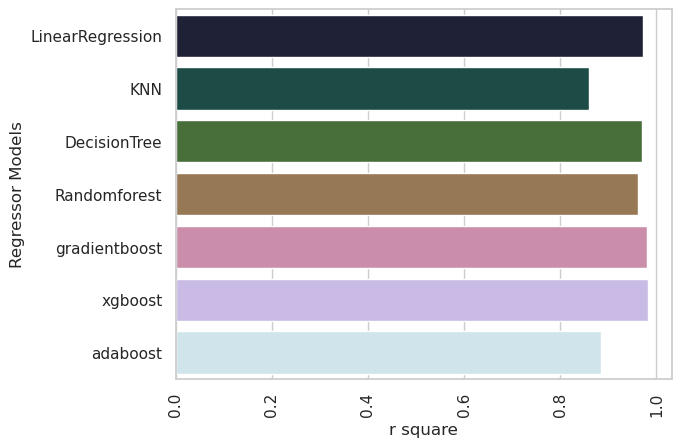

In [185]:
sns.barplot(x="r square",y="Regressor Models",orient="h",data=df_final,palette='cubehelix')
plt.xticks(rotation=90);

# **Step 6: Conclusion**

**In this notebook, I performed a comprehensive analysis on a dataset related to car prices, with a focus on the following factors:**

* Safety: I investigated how safety features of cars impact their prices, considering factors such as crash test ratings, airbag systems, and other safety-related features.

* Power: I examined the relationship between a car's power, typically measured in horsepower, and its price. This includes analyzing the performance of the engine, acceleration capabilities, and other power-related factors.

* Torque: I explored how torque, which is the rotational force produced by an engine, influences car prices. Torque is important for a vehicle's towing capacity, off-road performance, and overall driving experience.

* Seating Capacity: I analyzed how the seating capacity of a car, including the number of passengers it can accommodate, affects its price. This includes considering the configuration of seats, legroom, and other factors related to passenger comfort.

* Mileage: I investigated how the fuel efficiency of a car, typically measured in miles per gallon (MPG), impacts its price. This includes considering factors such as city and highway MPG, fuel type, and other fuel economy-related features.

* Extra Features: I examined the impact of additional features that a car may have, such as a sunroof, navigation system, leather seats, or other luxury or convenience features, on its price.

**Through data cleaning, feature engineering, and modeling, I analyzed the dataset to uncover hidden insights and trends related to these factors in the context of car prices. By utilizing techniques such as SelectKBest and multicollinearity analysis for feature selection, I refined the models to obtain the best possible performance. The results showed that the XGBoost model performed exceptionally well with an R-squared value of 98.2658%, indicating its effectiveness in predicting car prices based on the selected features.**

**This analysis provides valuable information to potential car buyers, empowering them to make informed decisions when purchasing a car by considering factors such as safety, power, torque, seating capacity, mileage, and extra features that are important to them.**

# **Smart Car Buying: Unlocking Insights and Strategies for Informed Decisions**

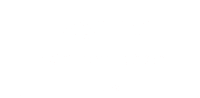